# Data Modelling (Variant I)

---

The modelling for this variant follows the same process as the Base dataset.

In [38]:
%run ../functions.py

In [18]:
X_train_v1_scaled = pd.read_csv('../Data/var1/X_train_v1_scaled.csv')
y_train_v1 = pd.read_csv('../Data/var1/y_train_v1.csv')
X_val_v1_scaled = pd.read_csv('../Data/var1/X_val_v1_scaled.csv')
y_val_v1 = pd.read_csv('../Data/var1/y_val_v1.csv')
X_test_v1_scaled = pd.read_csv('../Data/var1/X_test_v1_scaled.csv')
y_test_v1 = pd.read_csv('../Data/var1/y_test_v1.csv')

---

### Baseline Model

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

v1_baseline_model = DummyClassifier(random_state=21)

v1_baseline_model.fit(X_train_v1_scaled, y_train_v1)

v1_baseline_results = cross_val_score(v1_baseline_model,
                                      X_train_v1_scaled,
                                      y_train_v1,
                                      scoring='recall',
                                      cv=10).mean()

print(f"Train recall: {v1_baseline_results}")

Train recall: 0.010182846144592809


---

### First Model Iteration

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

n_features = X_train_v1_scaled.shape[1]

In [44]:
def modelling_v1(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v1 = models.Sequential()

    model_v1.add(layers.Input(shape=(n_features, )))
    model_v1.add(layers.Dense(32, activation='relu'))
    model_v1.add(layers.Dense(16, activation='relu'))
    model_v1.add(layers.Dense(1, activation='sigmoid'))

    model_v1.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v1_history = model_v1.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v1,
             name,
             model_v1_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00015: early stopping
Results for Variant I Model V1 with threshold = 0.5.

 Train f1: 0.026227142081308958 
 Val f1: 0.024291498243784675 

 Train Recall: 0.013372592628002167 
 Val Recall: 0.012413793243467808 

 Train FPR: 6.608721741940826e-05 
 Val FPR: 0.0001311868691118434


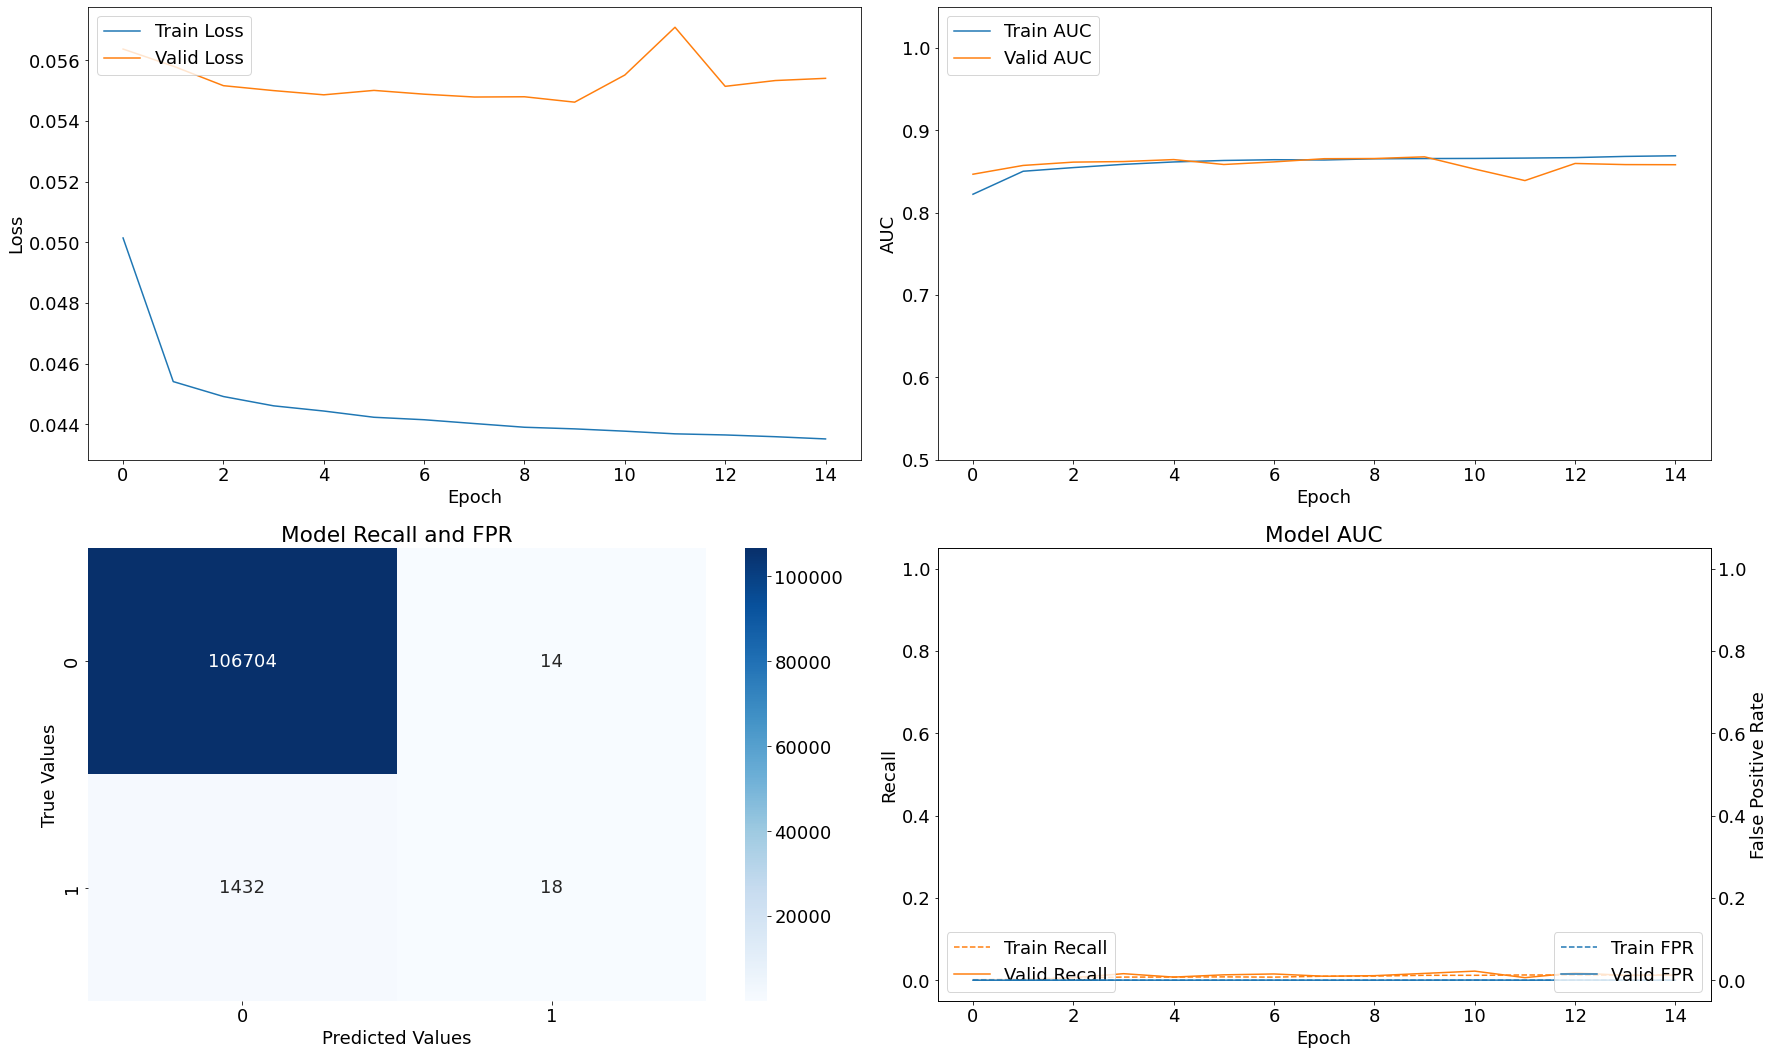

In [45]:
modelling_v1(X_train_v1_scaled,
             y_train_v1,
             X_val_v1_scaled,
             y_val_v1,
             'Variant I Model V1')

---

### Second Model Iteration

In [46]:
def modelling_v2(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v2 = models.Sequential()

    model_v2.add(layers.Input(shape=(n_features, )))
    model_v2.add(layers.Dense(32, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(16, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(1, activation='sigmoid'))

    model_v2.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['AUC',
                                   tf.keras.metrics.Precision(thresholds=threshold),
                                   tf.keras.metrics.Recall(thresholds=threshold),
                                   FalsePositiveRate(threshold=threshold)])

    model_v2_history = model_v2.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v2,
             name,
             model_v2_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00007: early stopping
Results for Variant I Model V2 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.004662004765123129 
 Val Recall: 0.0 

 Train FPR: 9.913082612911239e-05 
 Val FPR: 0.0


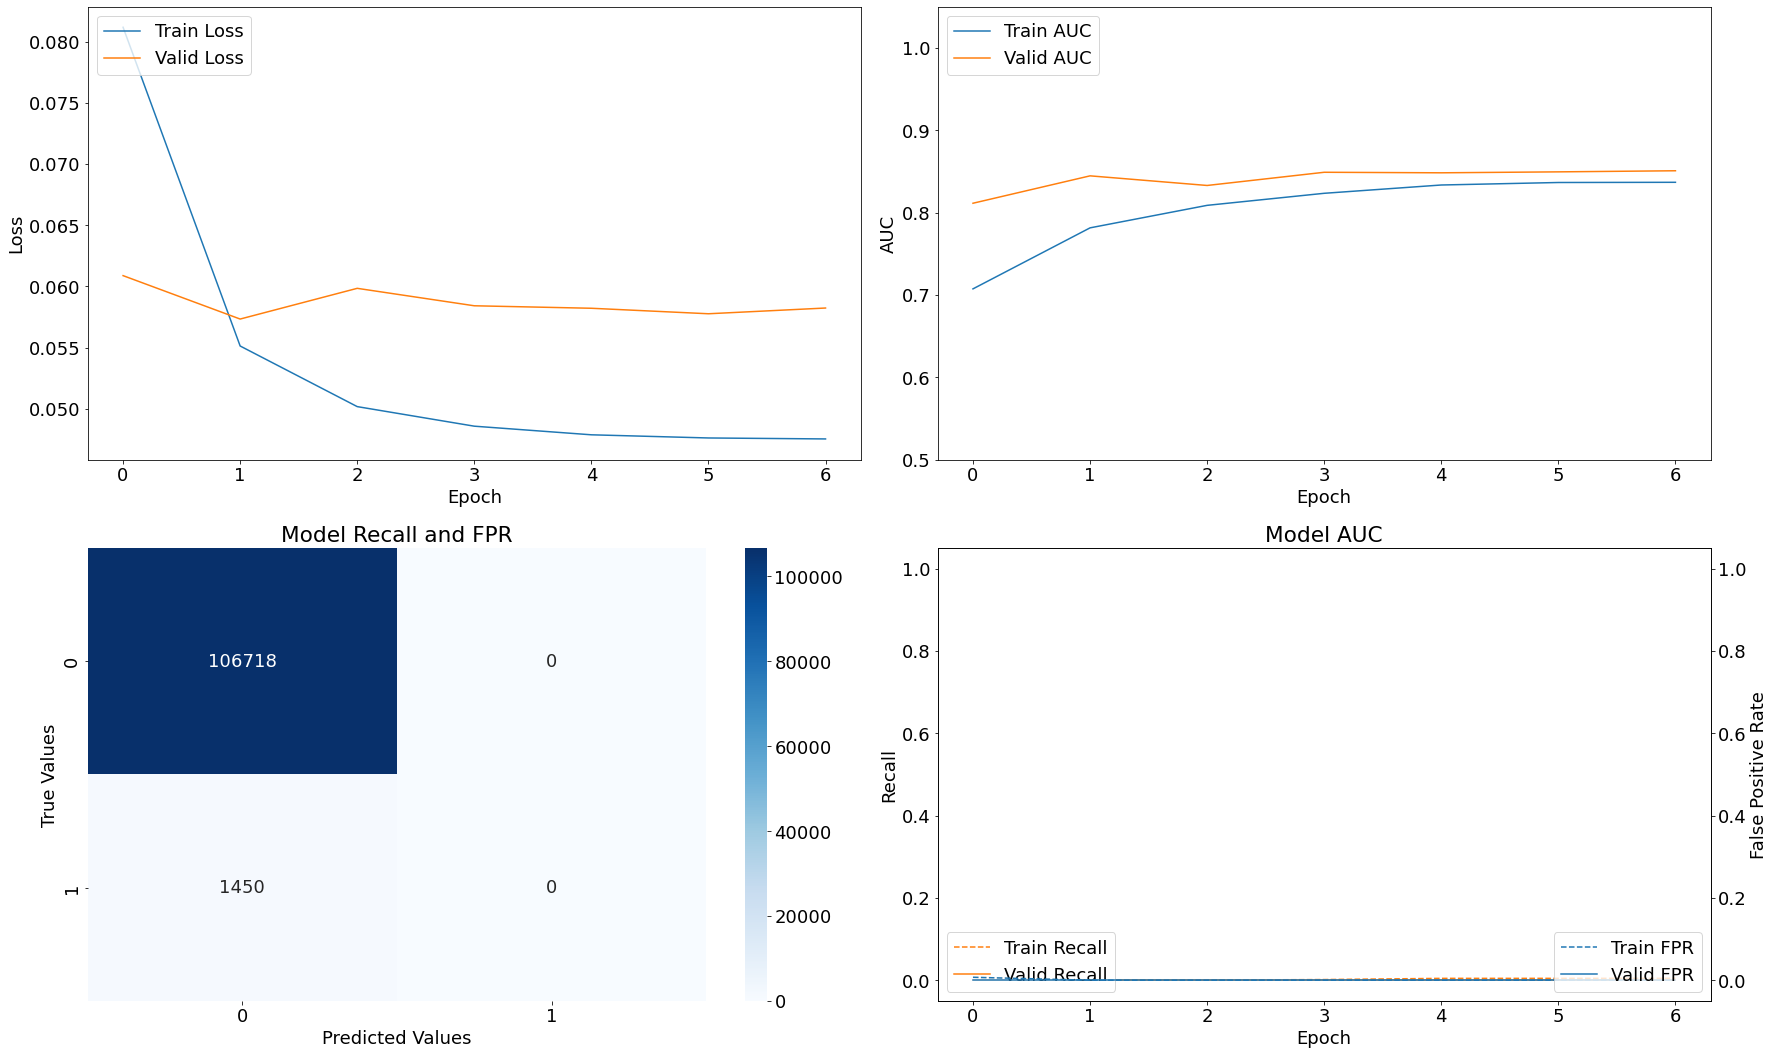

In [47]:
modelling_v2(X_train_v1_scaled,
             y_train_v1,
             X_val_v1_scaled,
             y_val_v1,
             'Variant I Model V2')

---

### Third Model Iteration

In [48]:
class_weight = create_class_weight({0: len(y_train_v1 == 0), 1: len(y_train_v1 == 1)})

In [49]:
def modelling_v3(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v3 = models.Sequential()

    model_v3.add(layers.Input(shape=(n_features, )))
    model_v3.add(layers.Dense(32, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(16, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(1, activation='sigmoid'))

    model_v3.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v3_history = model_v3.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v3,
             name,
             model_v3_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00007: early stopping
Results for Variant I Model V3 with threshold = 0.5.

 Train f1: N/A 
 Val f1: N/A 

 Train Recall: 0.0036805300042033195 
 Val Recall: 0.0 

 Train FPR: 8.260901813628152e-05 
 Val FPR: 0.0


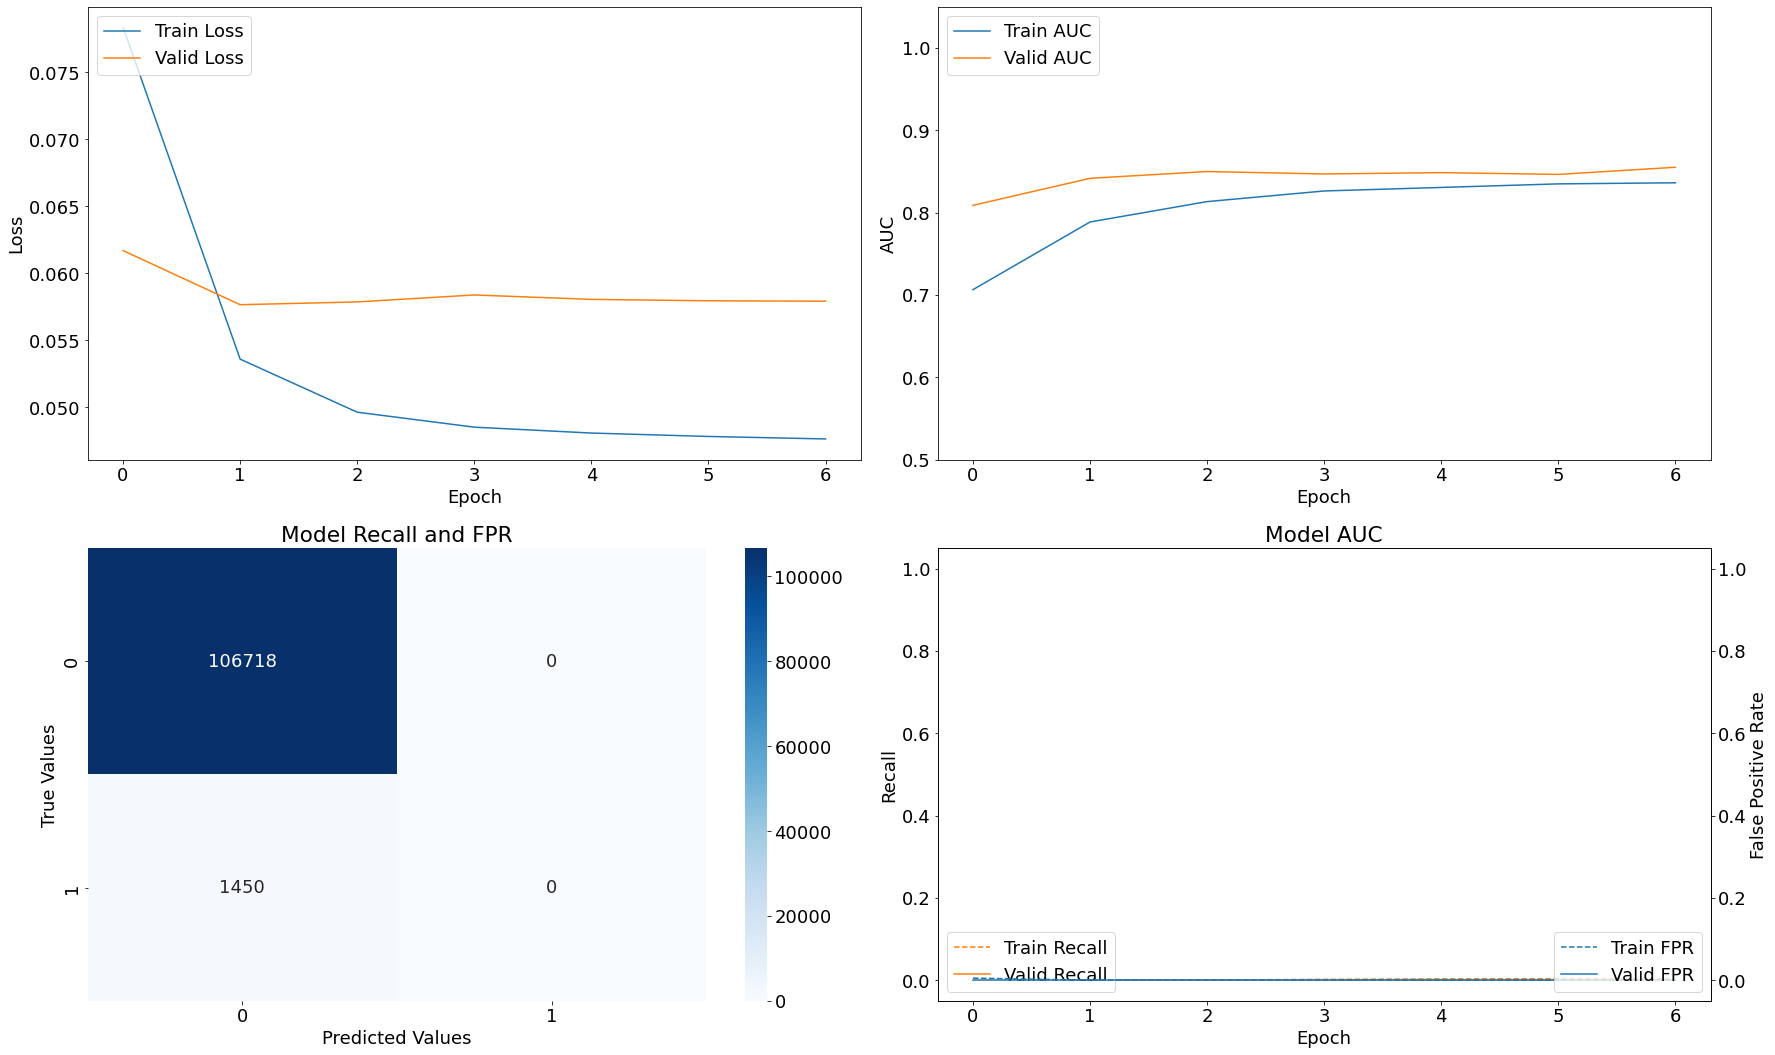

In [50]:
modelling_v3(X_train_v1_scaled,
             y_train_v1,
             X_val_v1_scaled,
             y_val_v1,
             'Variant I Model V3')

---

### Fourth Model Iteration

In [41]:
X_train_v1_scaled_resampled = pd.read_csv('../Data/var1/X_train_v1_scaled_resampled.csv')
y_train_v1_resampled = pd.read_csv('../Data/var1/y_train_v1_resampled.csv')

In [42]:
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

In [52]:
def modelling_v4(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):    
    
    model_v4 = models.Sequential()

    model_v4.add(layers.Input(shape=(n_features, )))
    model_v4.add(layers.Dense(32, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(16, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(1, activation='sigmoid'))

    model_v4.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v4_history = model_v4.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history

    evaluate(model_v4,
             'Base Model V4',
             model_v4_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00012: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.6556762275848701 
 Val f1: 0.19011531945885163 

 Train Recall: 0.5820018649101257 
 Val Recall: 0.3979310393333435 

 Train FPR: 0.048317380249500275 
 Val FPR: 0.03788489103317261


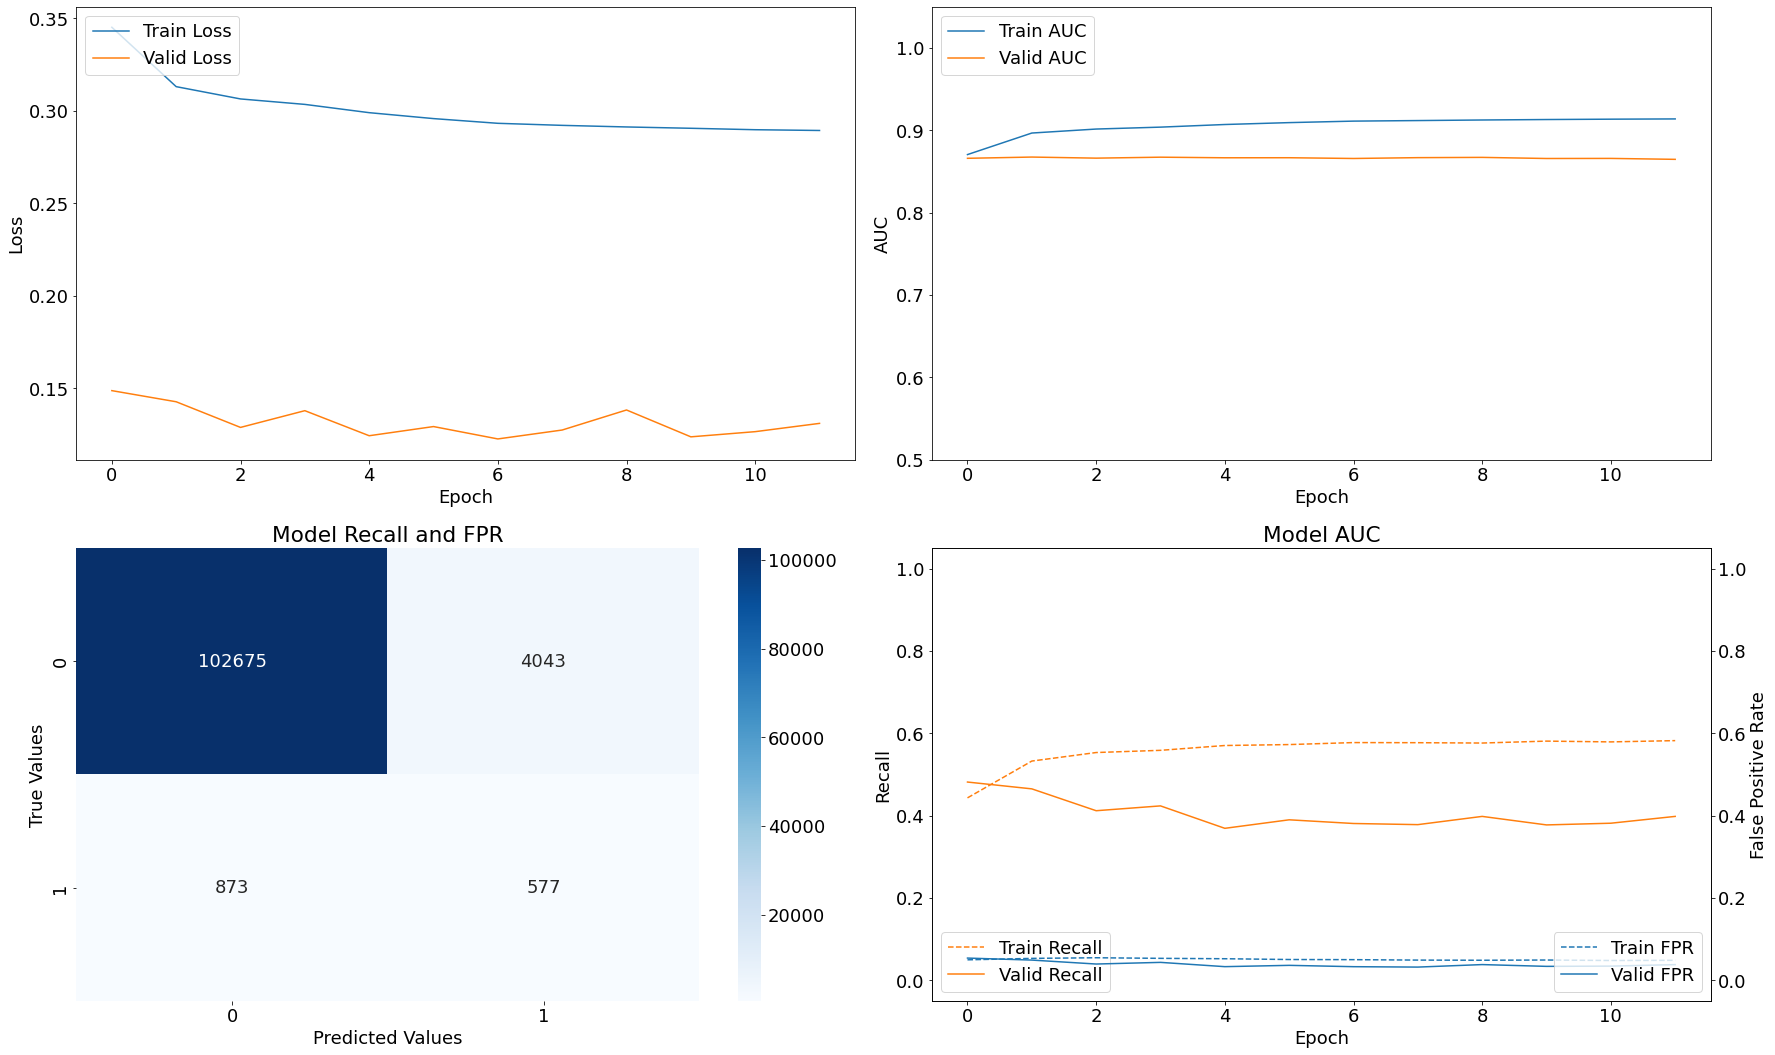

Epoch 00017: early stopping
Results for Base Model V4 with threshold = 0.4.

 Train f1: 0.704894389119163 
 Val f1: 0.18181818404482505 

 Train Recall: 0.6987631320953369 
 Val Recall: 0.45379310846328735 

 Train FPR: 0.07095988094806671 
 Val FPR: 0.04807061702013016


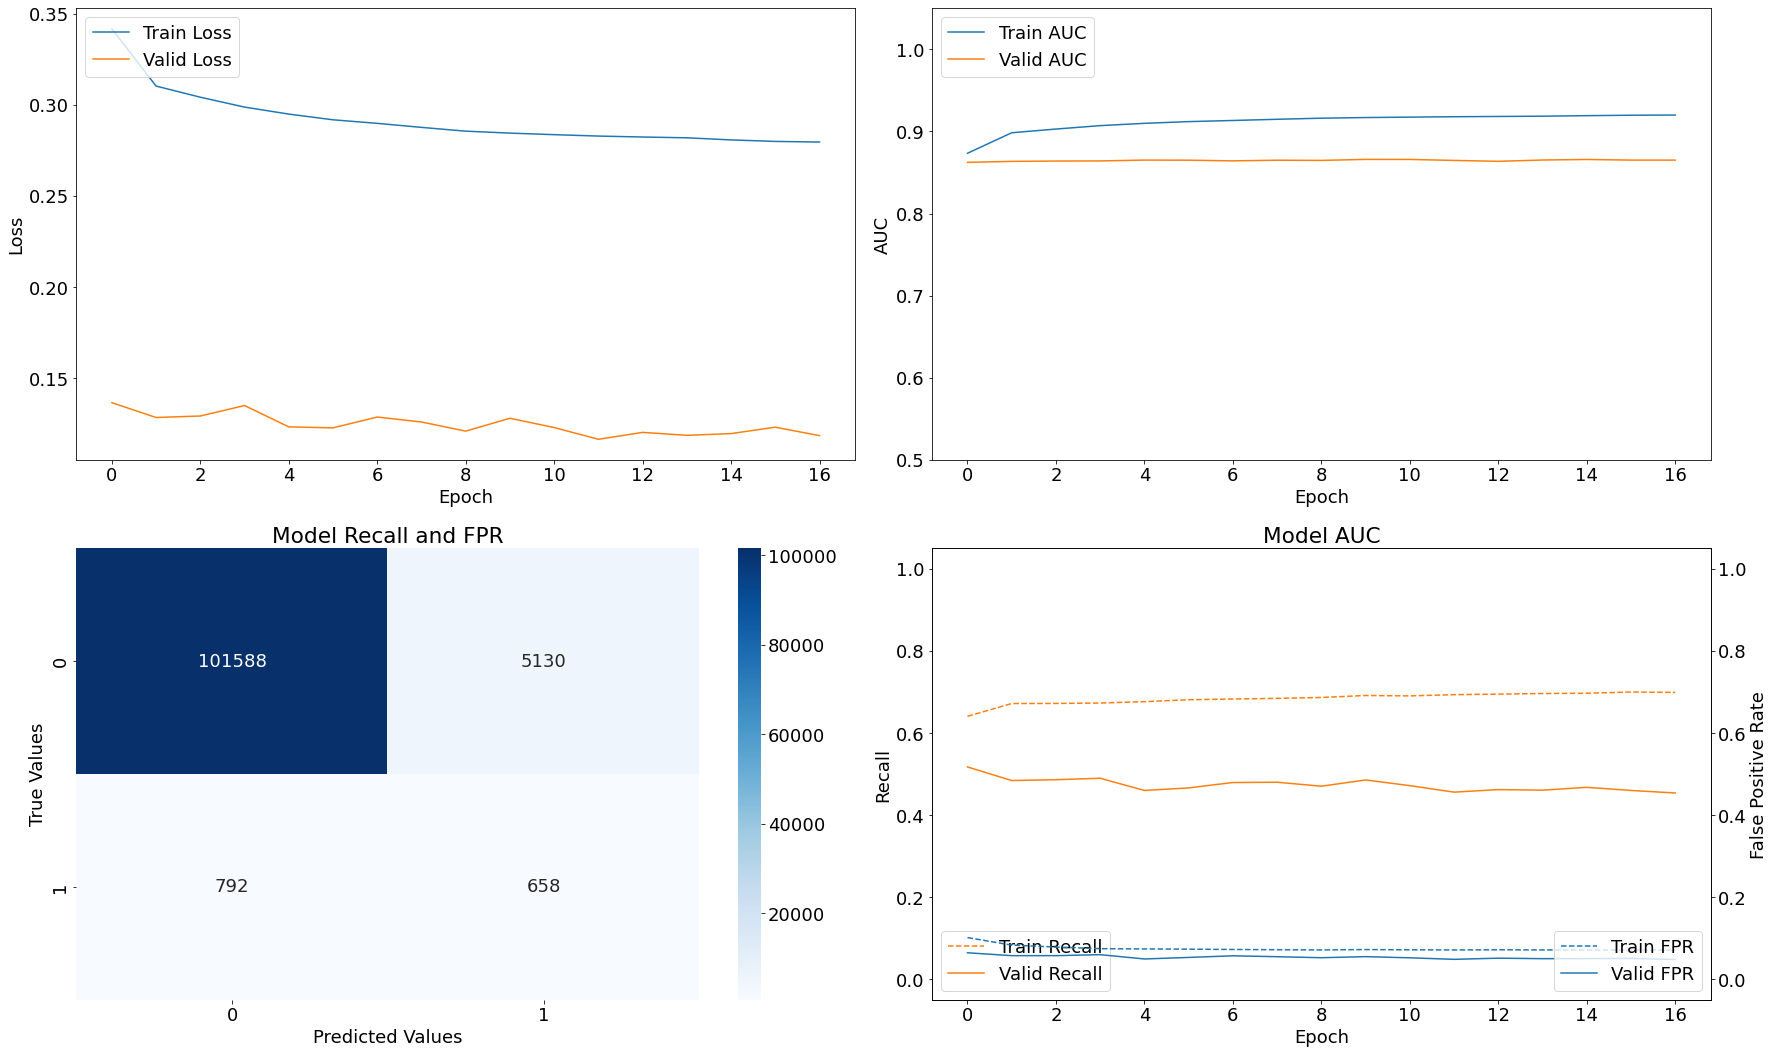

Epoch 00016: early stopping
Results for Base Model V4 with threshold = 0.3.

 Train f1: 0.7039159320687914 
 Val f1: 0.14731078468409528 

 Train Recall: 0.8009191155433655 
 Val Recall: 0.5751724243164062 

 Train FPR: 0.11867231130599976 
 Val FPR: 0.08469986170530319


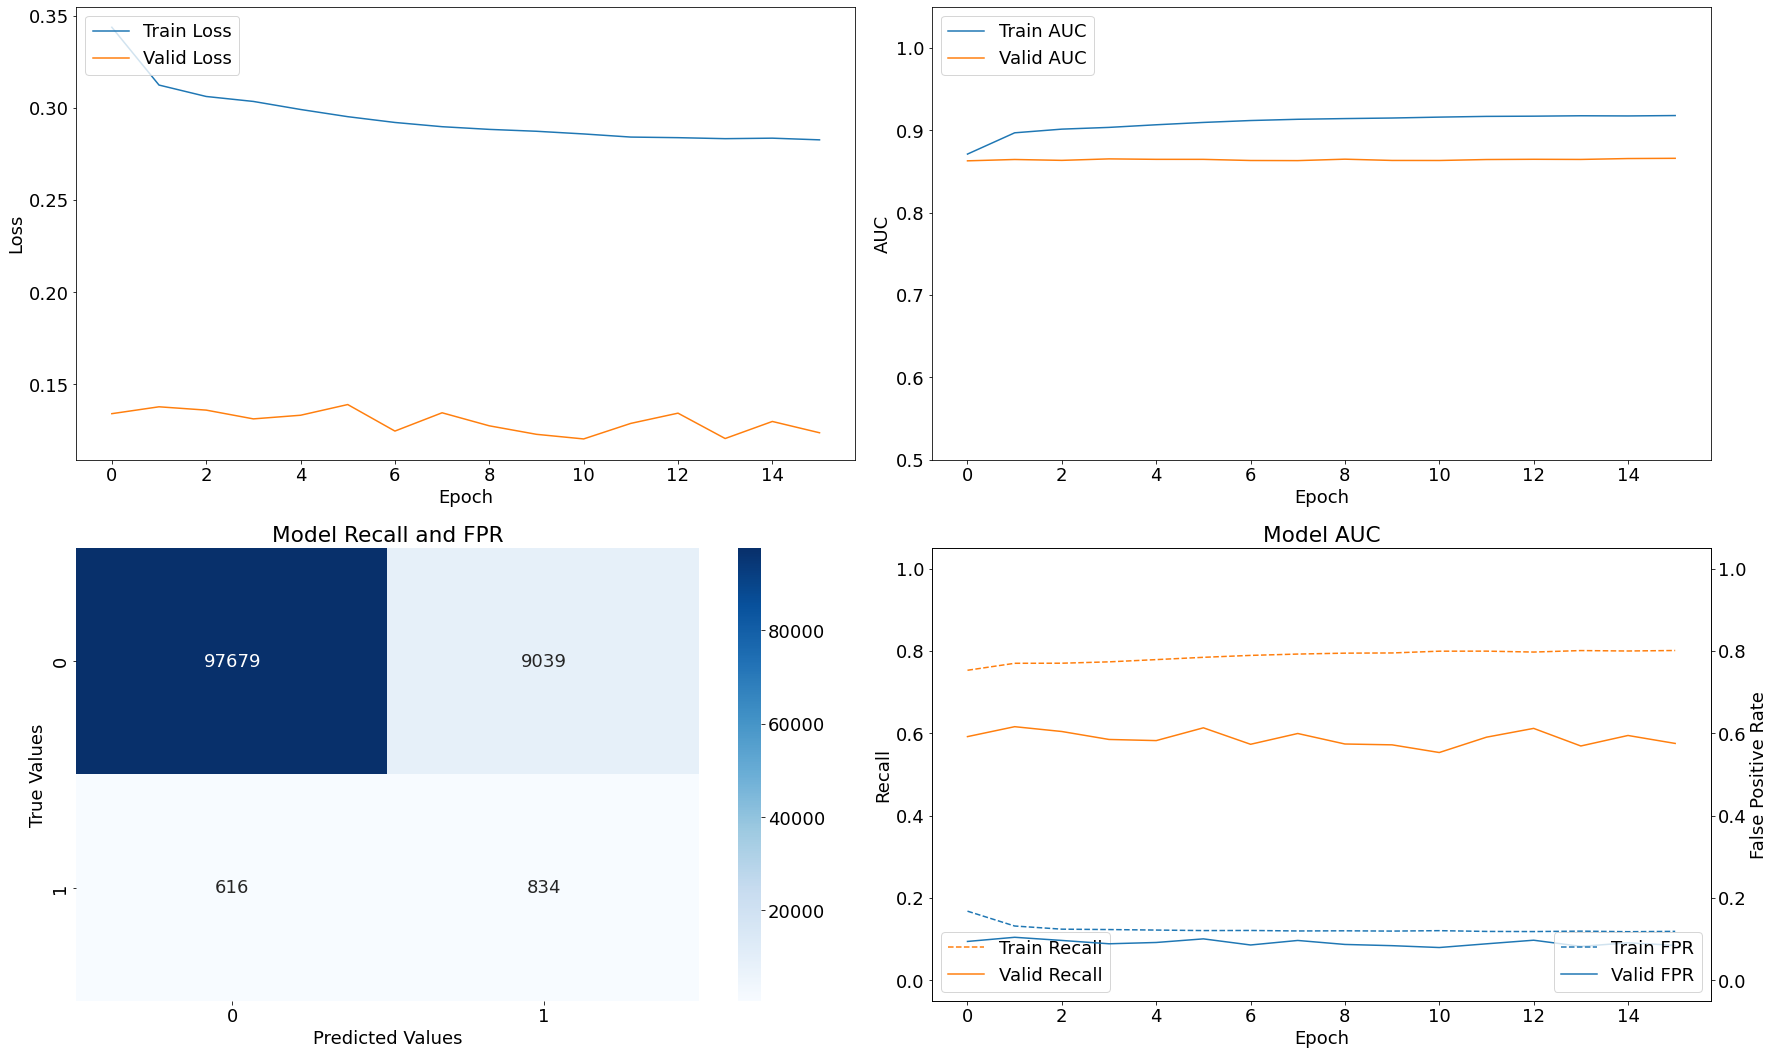

Epoch 00017: early stopping
Results for Base Model V4 with threshold = 0.2.

 Train f1: 0.6600006345906376 
 Val f1: 0.11577356379332633 

 Train Recall: 0.8819983005523682 
 Val Recall: 0.686896562576294 

 Train FPR: 0.1976795792579651 
 Val FPR: 0.13830843567848206


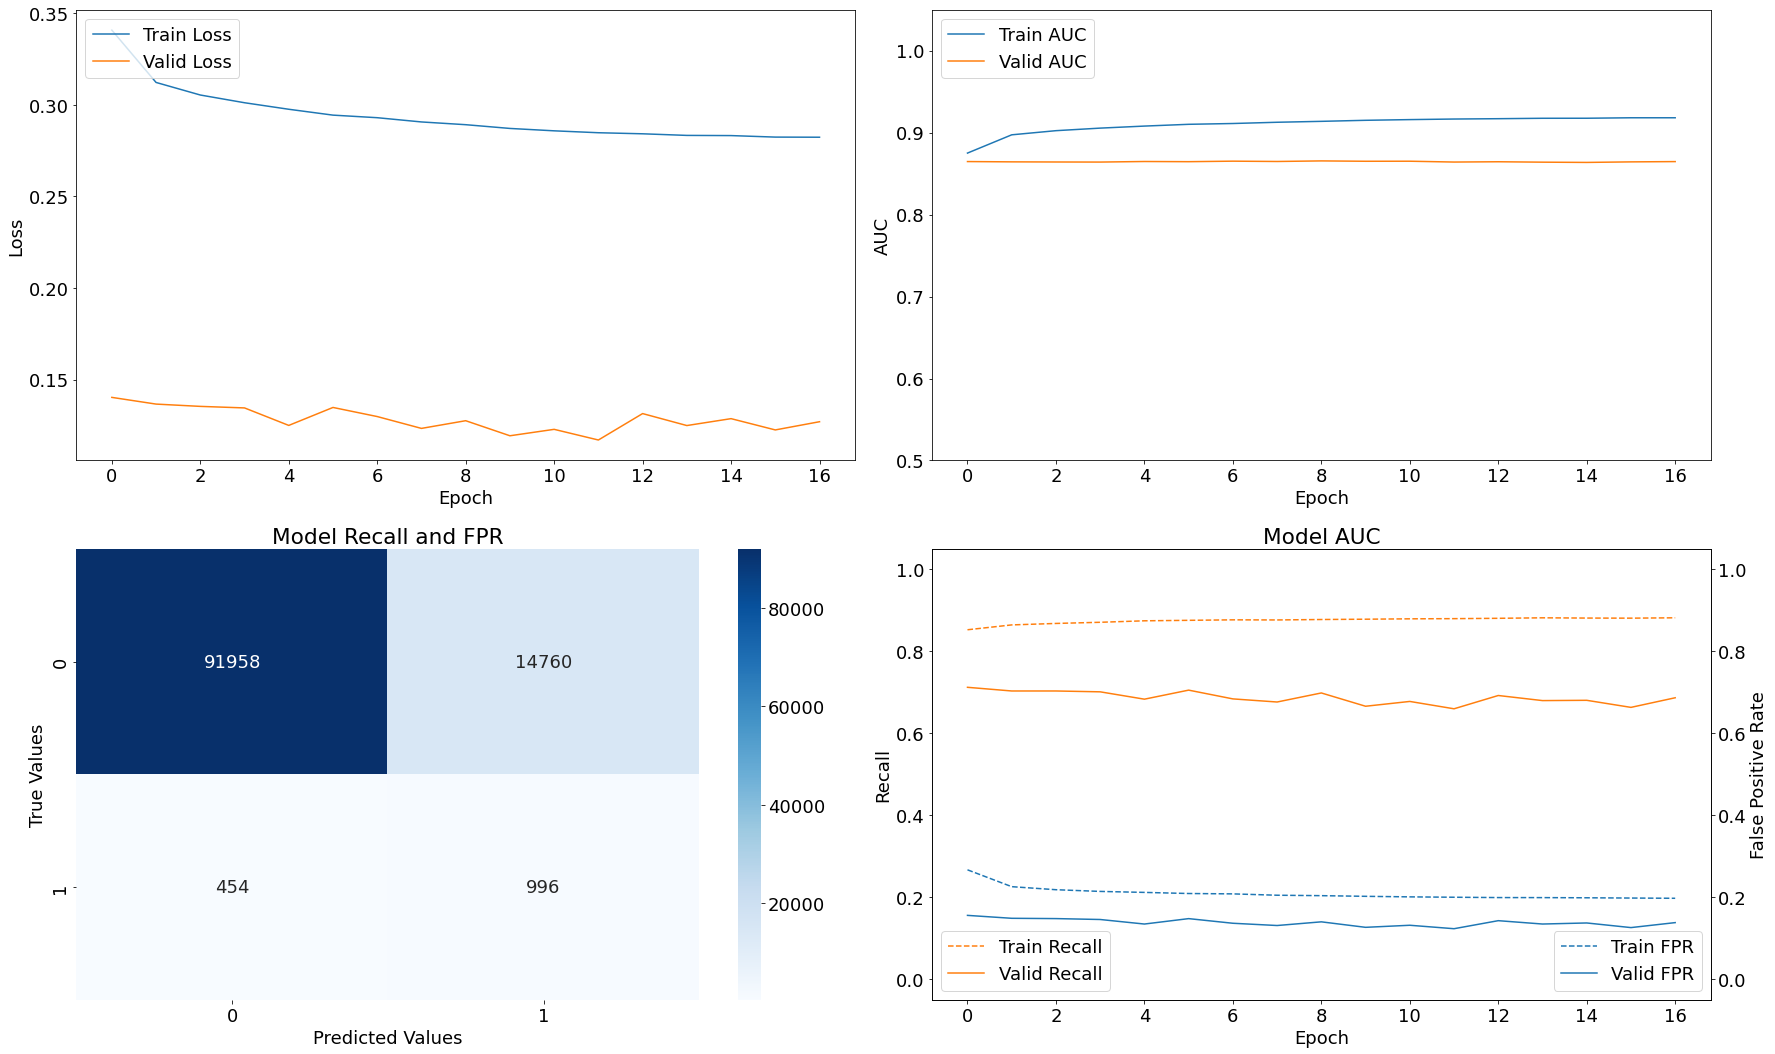

Epoch 00017: early stopping
Results for Base Model V4 with threshold = 0.1.

 Train f1: 0.593327883024068 
 Val f1: 0.08283186131164494 

 Train Recall: 0.9389504194259644 
 Val Recall: 0.8068965673446655 

 Train FPR: 0.30651888251304626 
 Val FPR: 0.24016566574573517


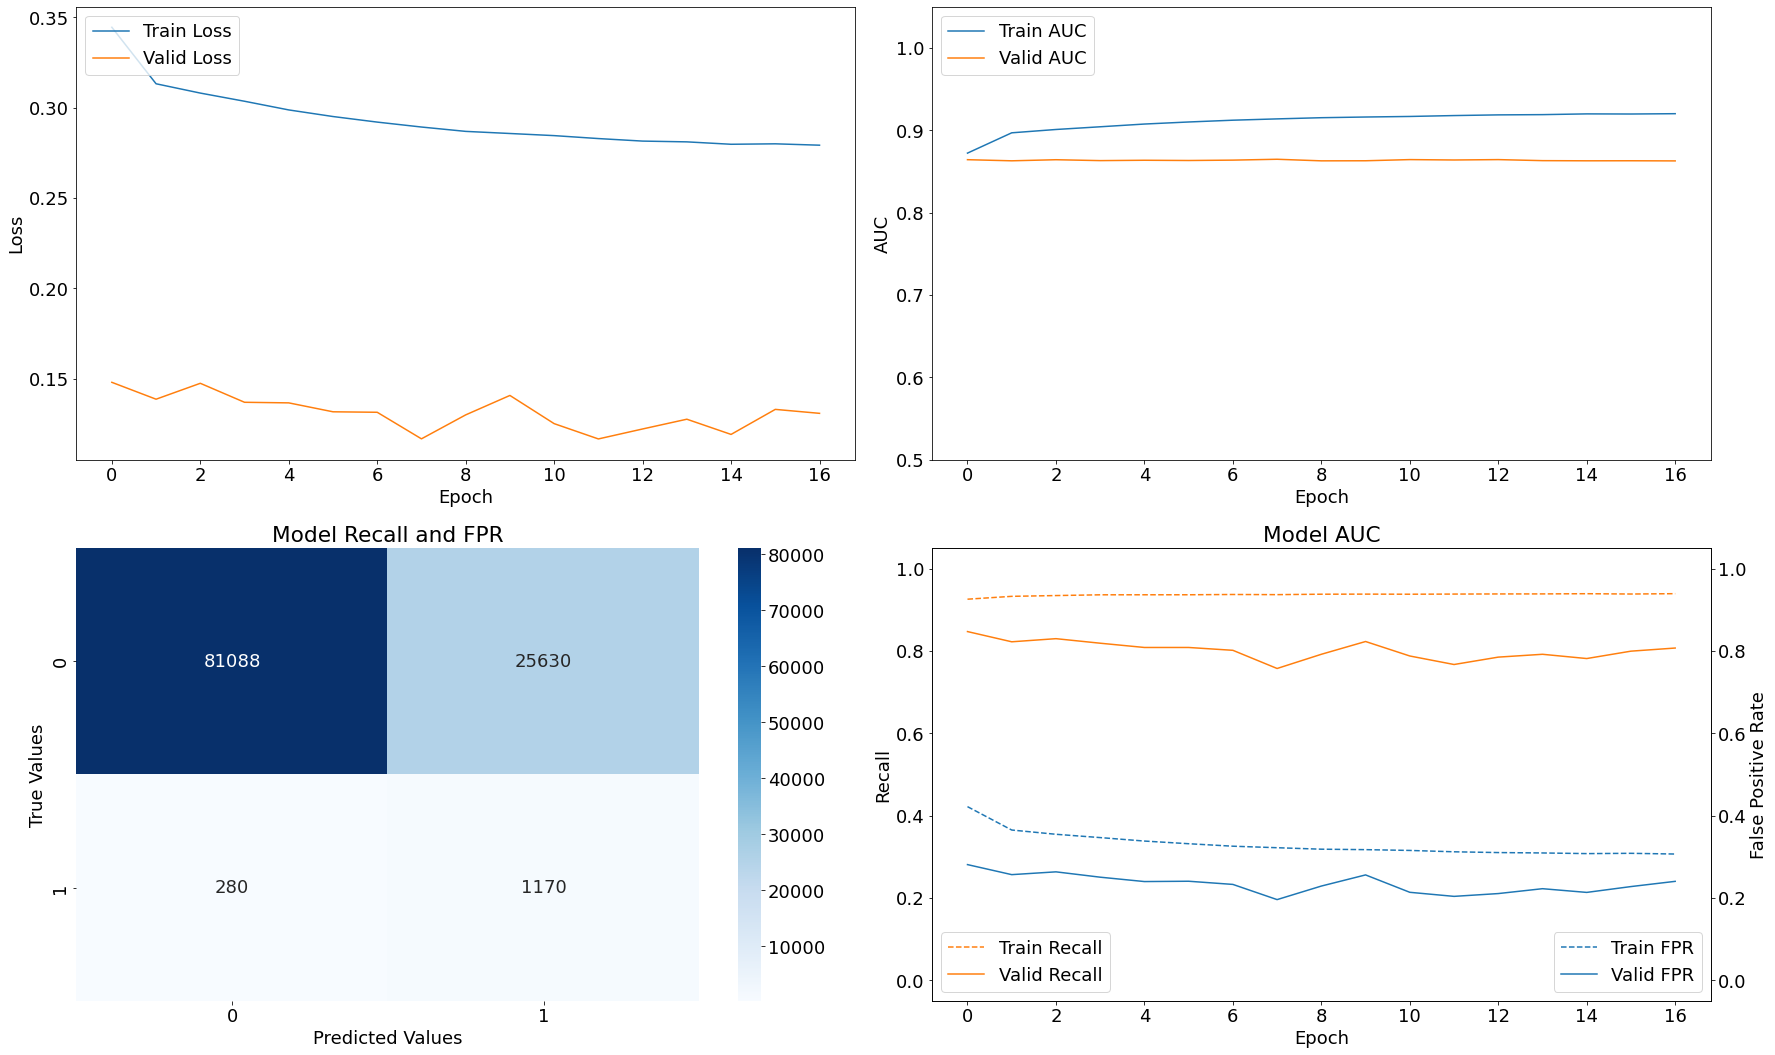

In [53]:
for t in thresholds:
    
    modelling_v4(X_train_v1_scaled_resampled,
                 y_train_v1_resampled,
                 X_val_v1_scaled,
                 y_val_v1,
                 'Variant I Model V4',
                 threshold=t)

---

### Fifth Model Iteration

In [54]:
def modelling_v5(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v5 = models.Sequential()

    model_v5.add(layers.Input(shape=(n_features, )))
    model_v5.add(layers.Dense(32, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(16, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(8, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(4, activation='relu'))
    model_v5.add(layers.Dense(2, activation='relu'))
    model_v5.add(layers.Dense(1, activation='sigmoid'))

    model_v5.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v5_history = model_v5.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v5,
             name,
             model_v5_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00006: early stopping
Results for Variant I Model V5 with threshold = 0.5.

 Train f1: 0.6483207974141882 
 Val f1: 0.12356979654556956 

 Train Recall: 0.6015281677246094 
 Val Recall: 0.6331034302711487 

 Train FPR: 0.06353142112493515 
 Val FPR: 0.11703742295503616


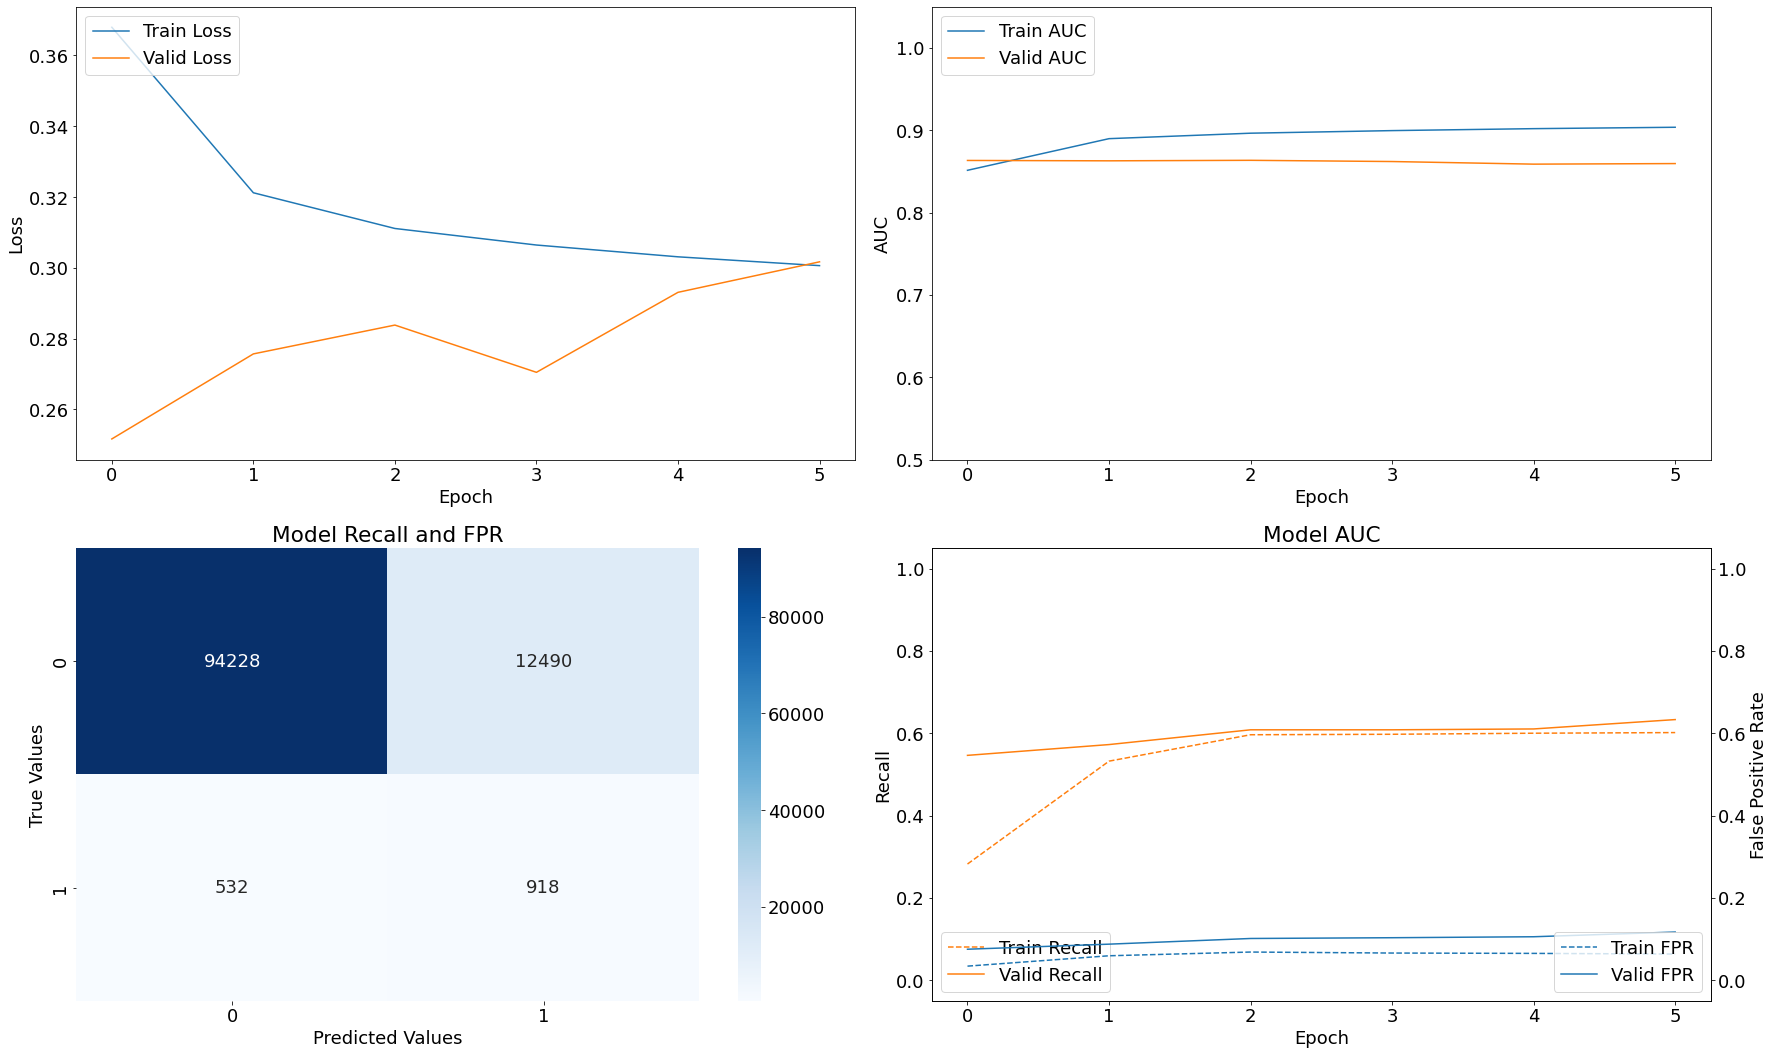

Epoch 00006: early stopping
Results for Variant I Model V5 with threshold = 0.4.

 Train f1: 0.6848105917330589 
 Val f1: 0.13571201302080899 

 Train Recall: 0.7032164335250854 
 Val Recall: 0.5875862240791321 

 Train FPR: 0.08763419091701508 
 Val FPR: 0.09608501195907593


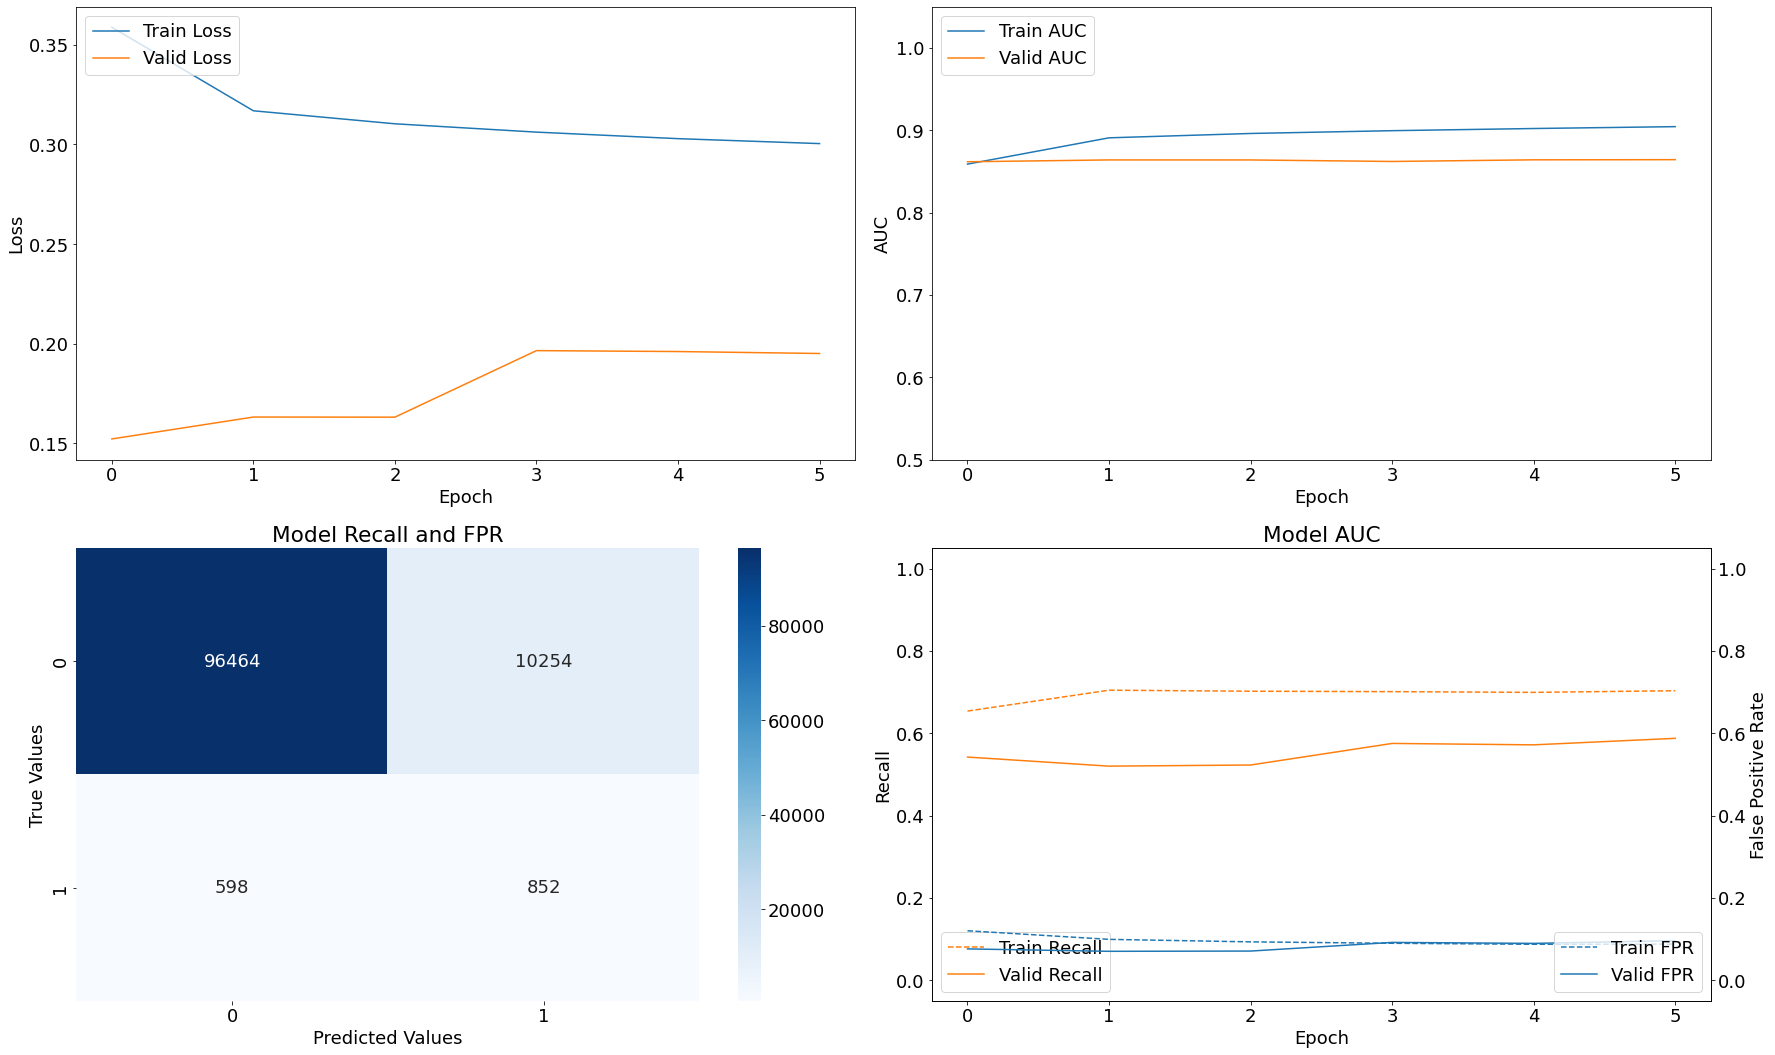

Epoch 00020: early stopping
Results for Variant I Model V5 with threshold = 0.3.

 Train f1: 0.6838723401649296 
 Val f1: 0.14787661982460304 

 Train Recall: 0.744724452495575 
 Val Recall: 0.5703448057174683 

 Train FPR: 0.1083093211054802 
 Val FPR: 0.08347232639789581


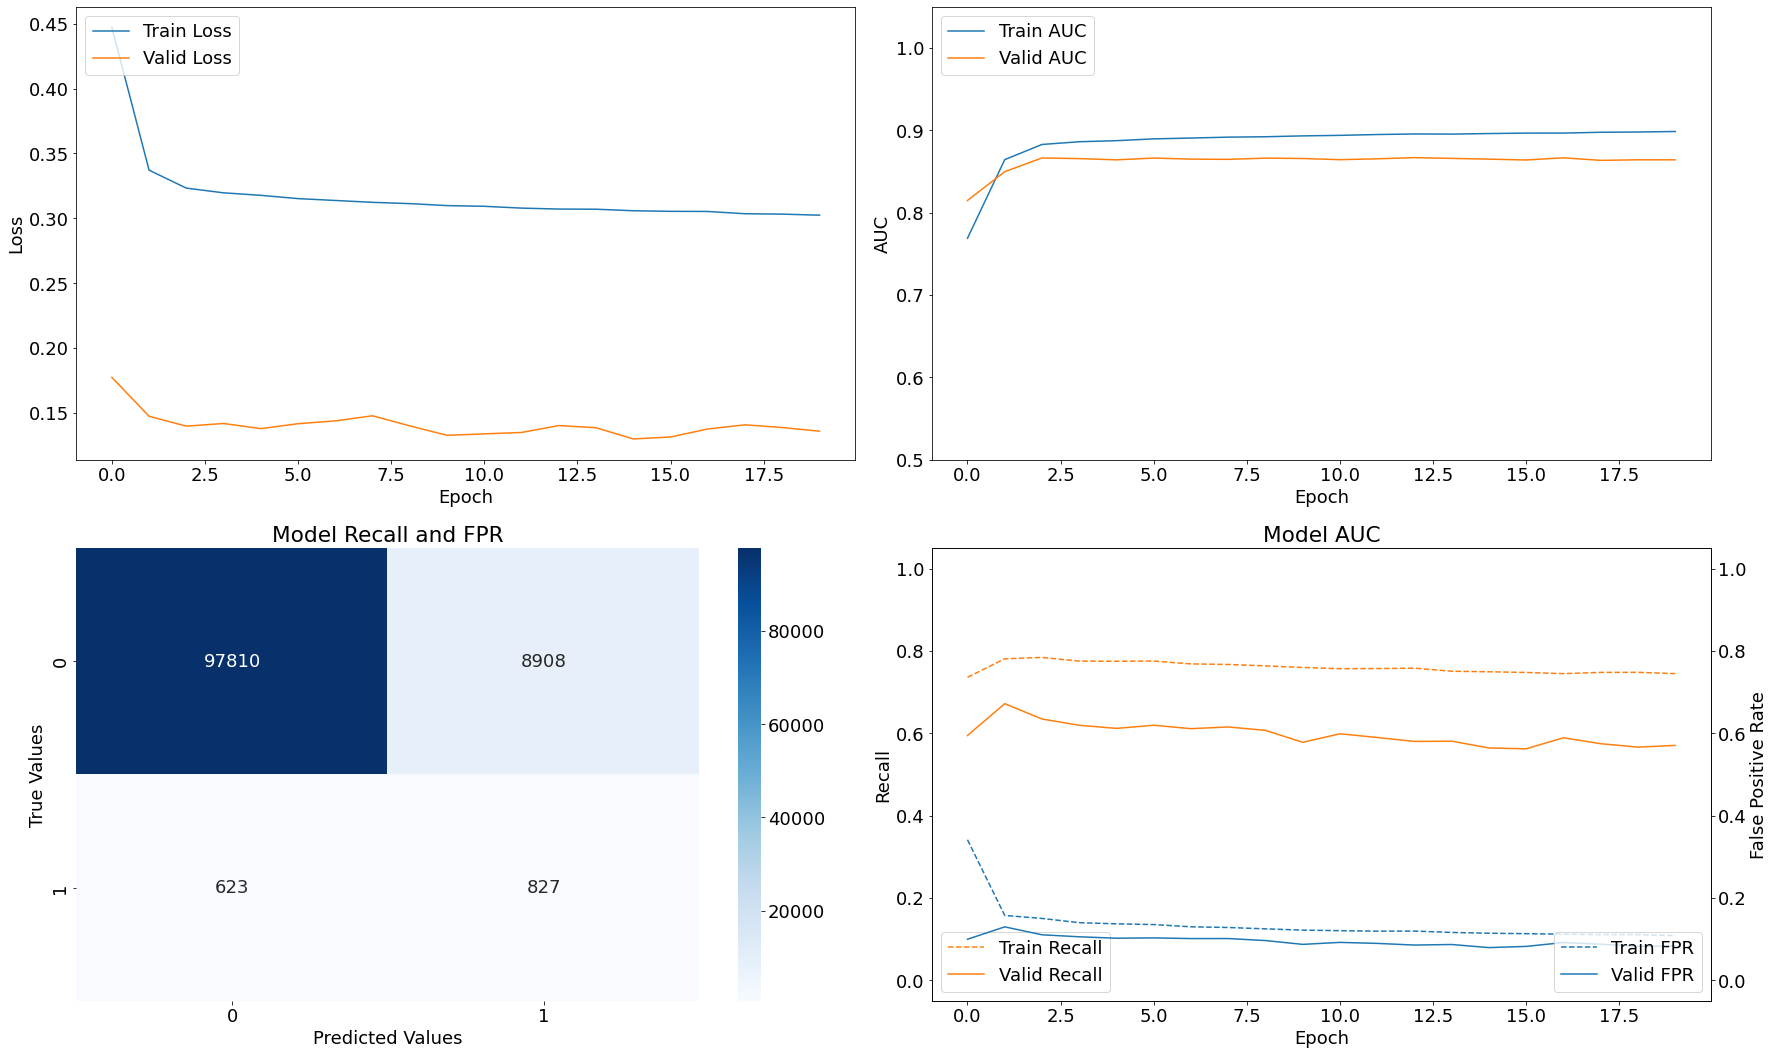

Epoch 00009: early stopping
Results for Variant I Model V5 with threshold = 0.2.

 Train f1: 0.6703136180243244 
 Val f1: 0.1306346388690498 

 Train Recall: 0.7945391535758972 
 Val Recall: 0.6075862050056458 

 Train FPR: 0.14402692019939423 
 Val FPR: 0.10454656183719635


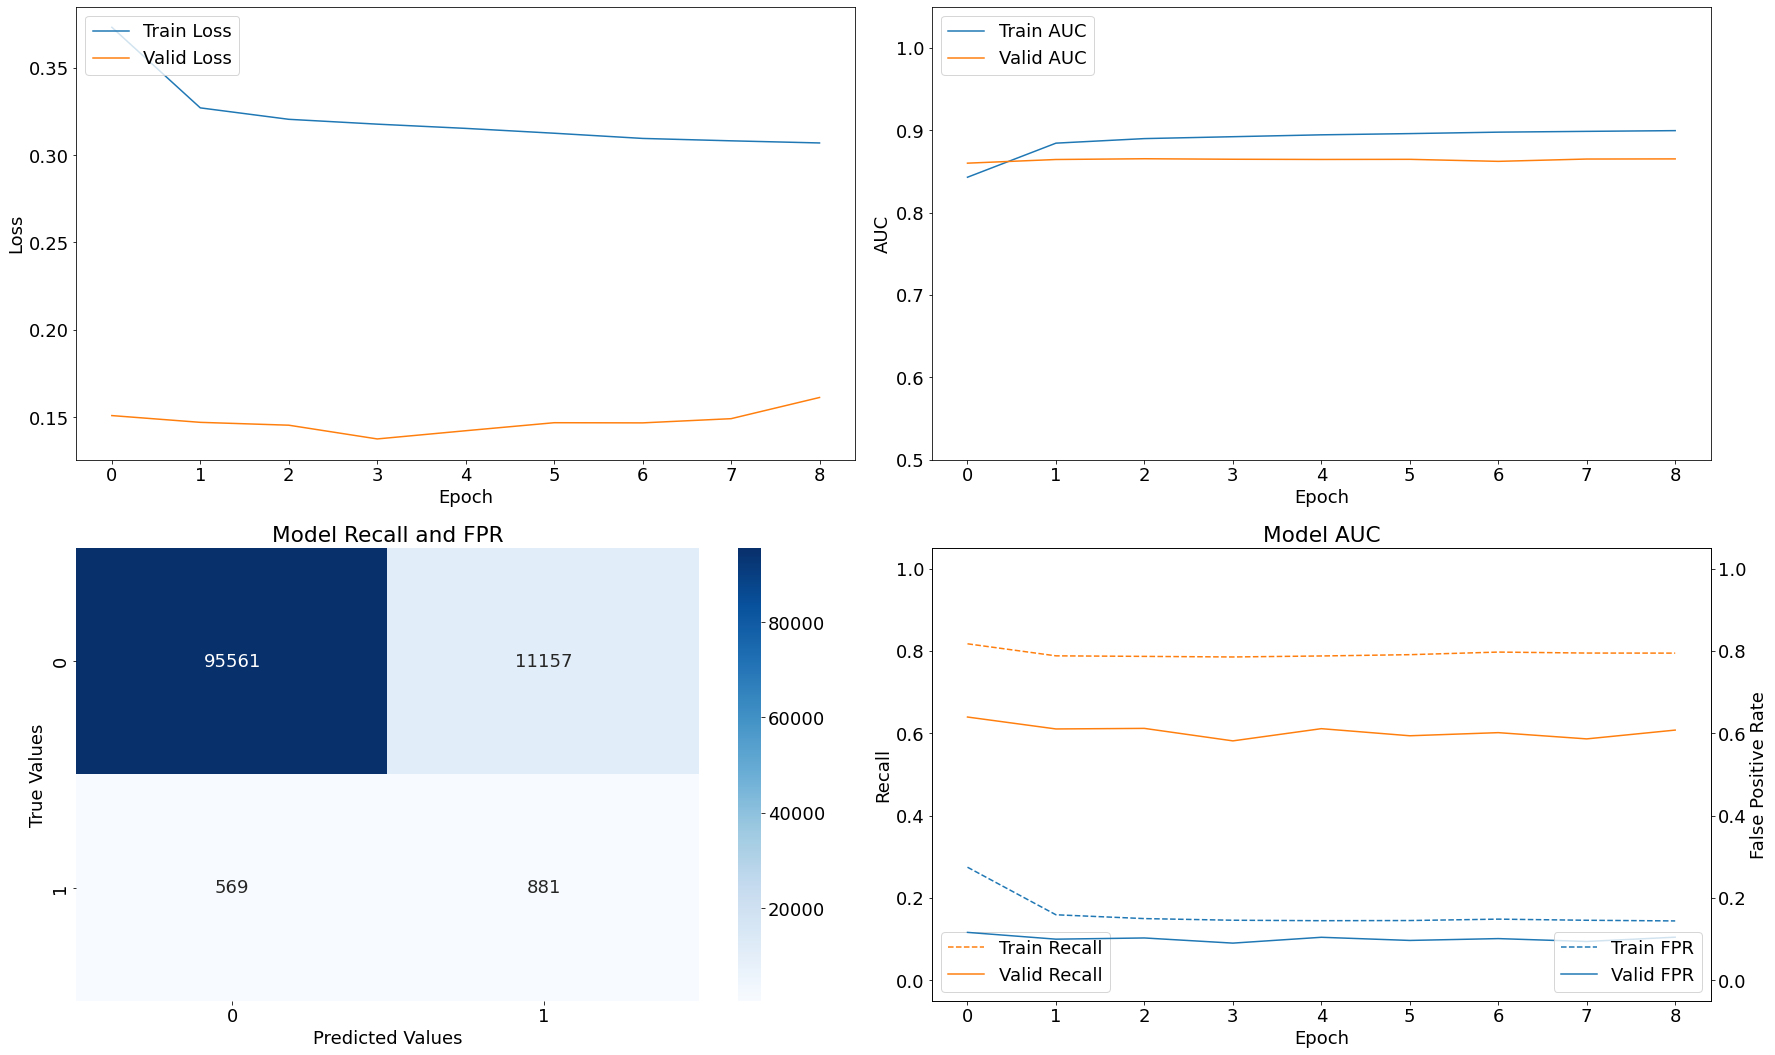

Epoch 00027: early stopping
Results for Variant I Model V5 with threshold = 0.1.

 Train f1: 0.6032743761468575 
 Val f1: 0.115654843525953 

 Train Recall: 0.9013110995292664 
 Val Recall: 0.6641379594802856 

 Train FPR: 0.2716870903968811 
 Val FPR: 0.13343578577041626


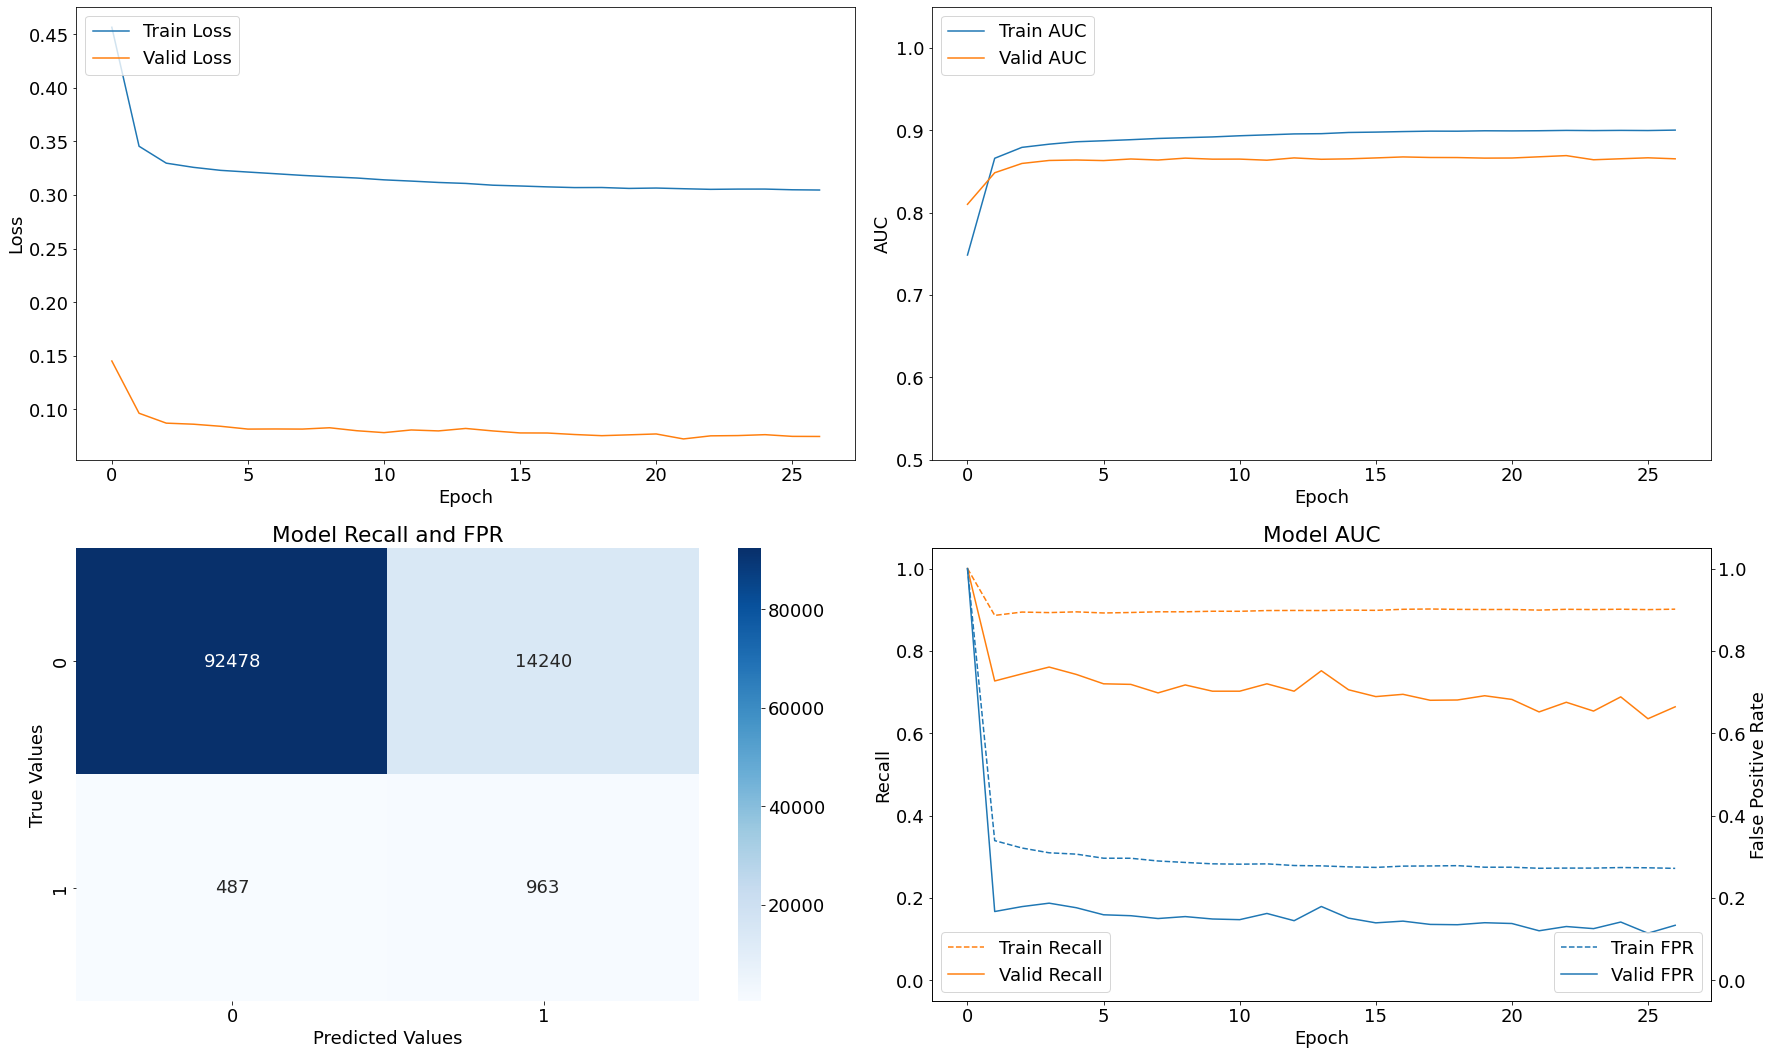

In [64]:
for t in thresholds:
    
    modelling_v5(X_train_v1_scaled_resampled,
                 y_train_v1_resampled,
                 X_val_v1_scaled,
                 y_val_v1,
                 'Variant I Model V5',
                 threshold=t)

---

### Sixth Model Iteration

In [56]:
def modelling_v6(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):     
    
    model_v6 = models.Sequential()

    model_v6.add(layers.Input(shape=(n_features, )))
    model_v6.add(layers.Dense(32, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(16, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(1, activation='sigmoid'))

    model_v6.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v6_history = model_v6.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v6,
             name,
             model_v6_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00006: early stopping
Results for Variant I Model V6 with threshold = 0.5.

 Train f1: 0.6500041075867842 
 Val f1: 0.1830351399020695 

 Train Recall: 0.5823119282722473 
 Val Recall: 0.4903448224067688 

 Train FPR: 0.052351243793964386 
 Val FPR: 0.052549708634614944


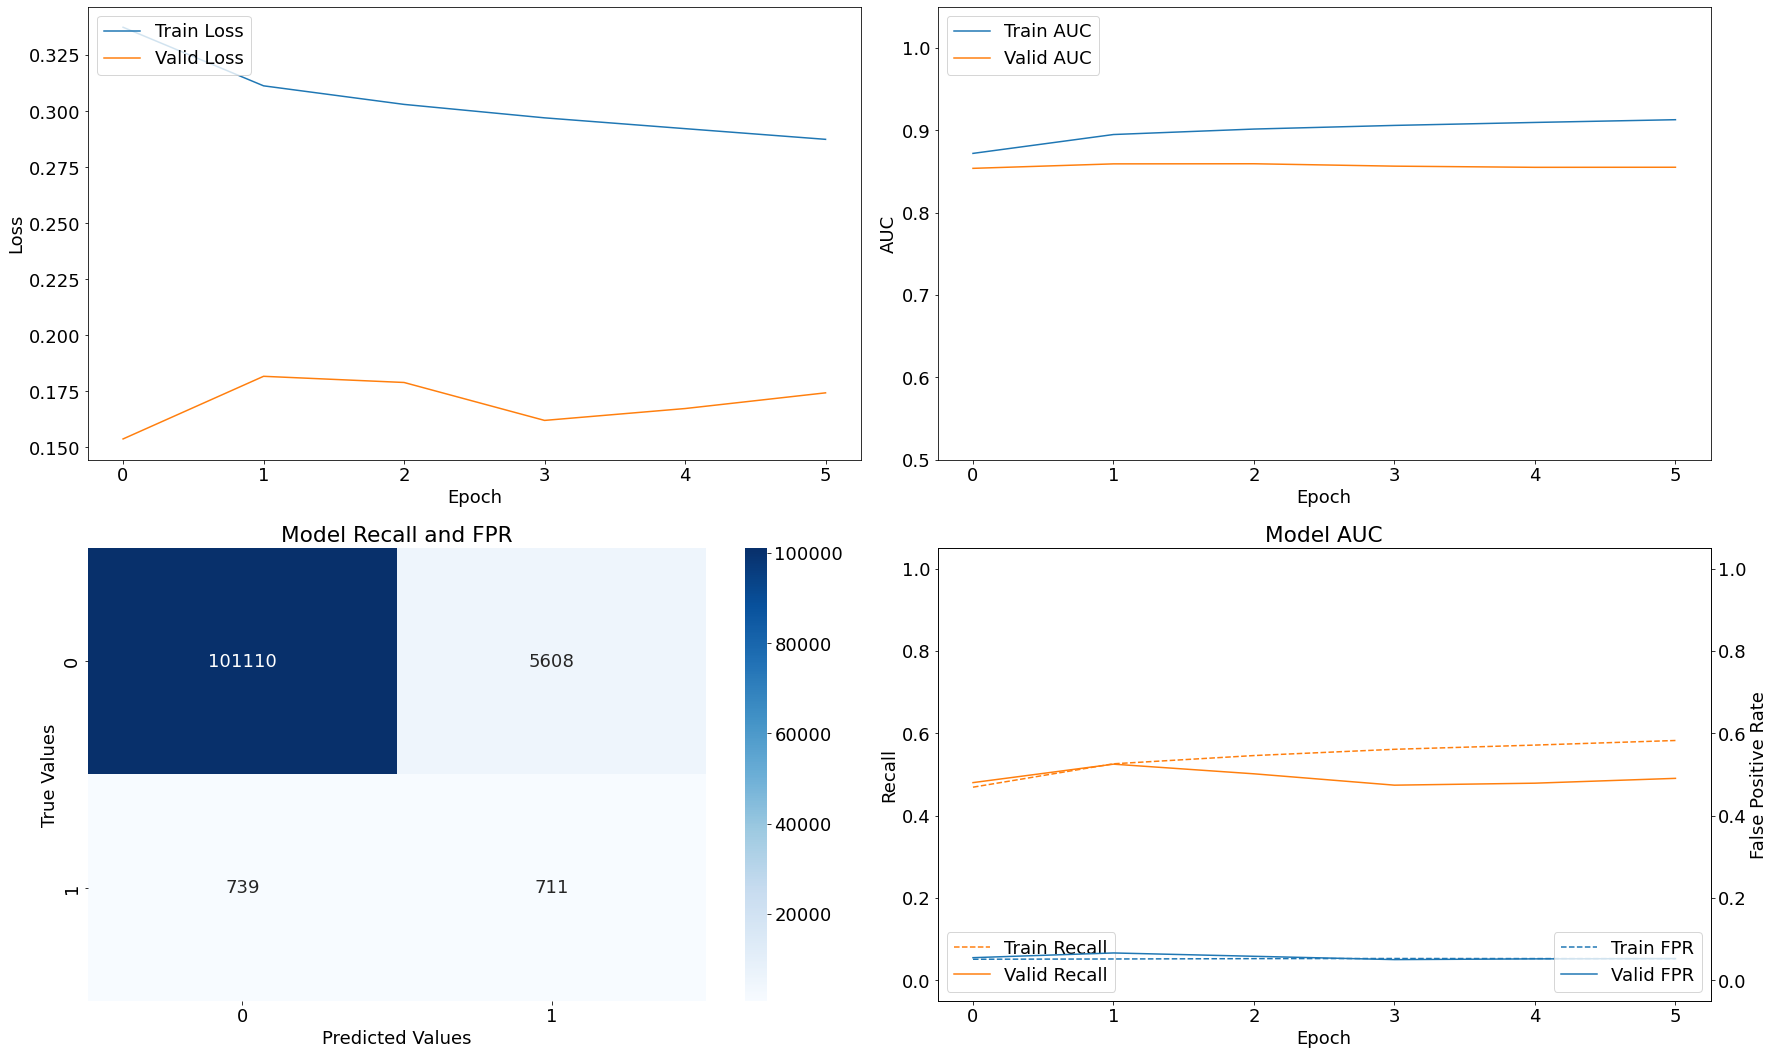

Epoch 00006: early stopping
Results for Variant I Model V6 with threshold = 0.4.

 Train f1: 0.6782257000110006 
 Val f1: 0.15720351995801748 

 Train Recall: 0.6899277567863464 
 Val Recall: 0.5489655137062073 

 Train FPR: 0.08614468574523926 
 Val FPR: 0.07384883612394333


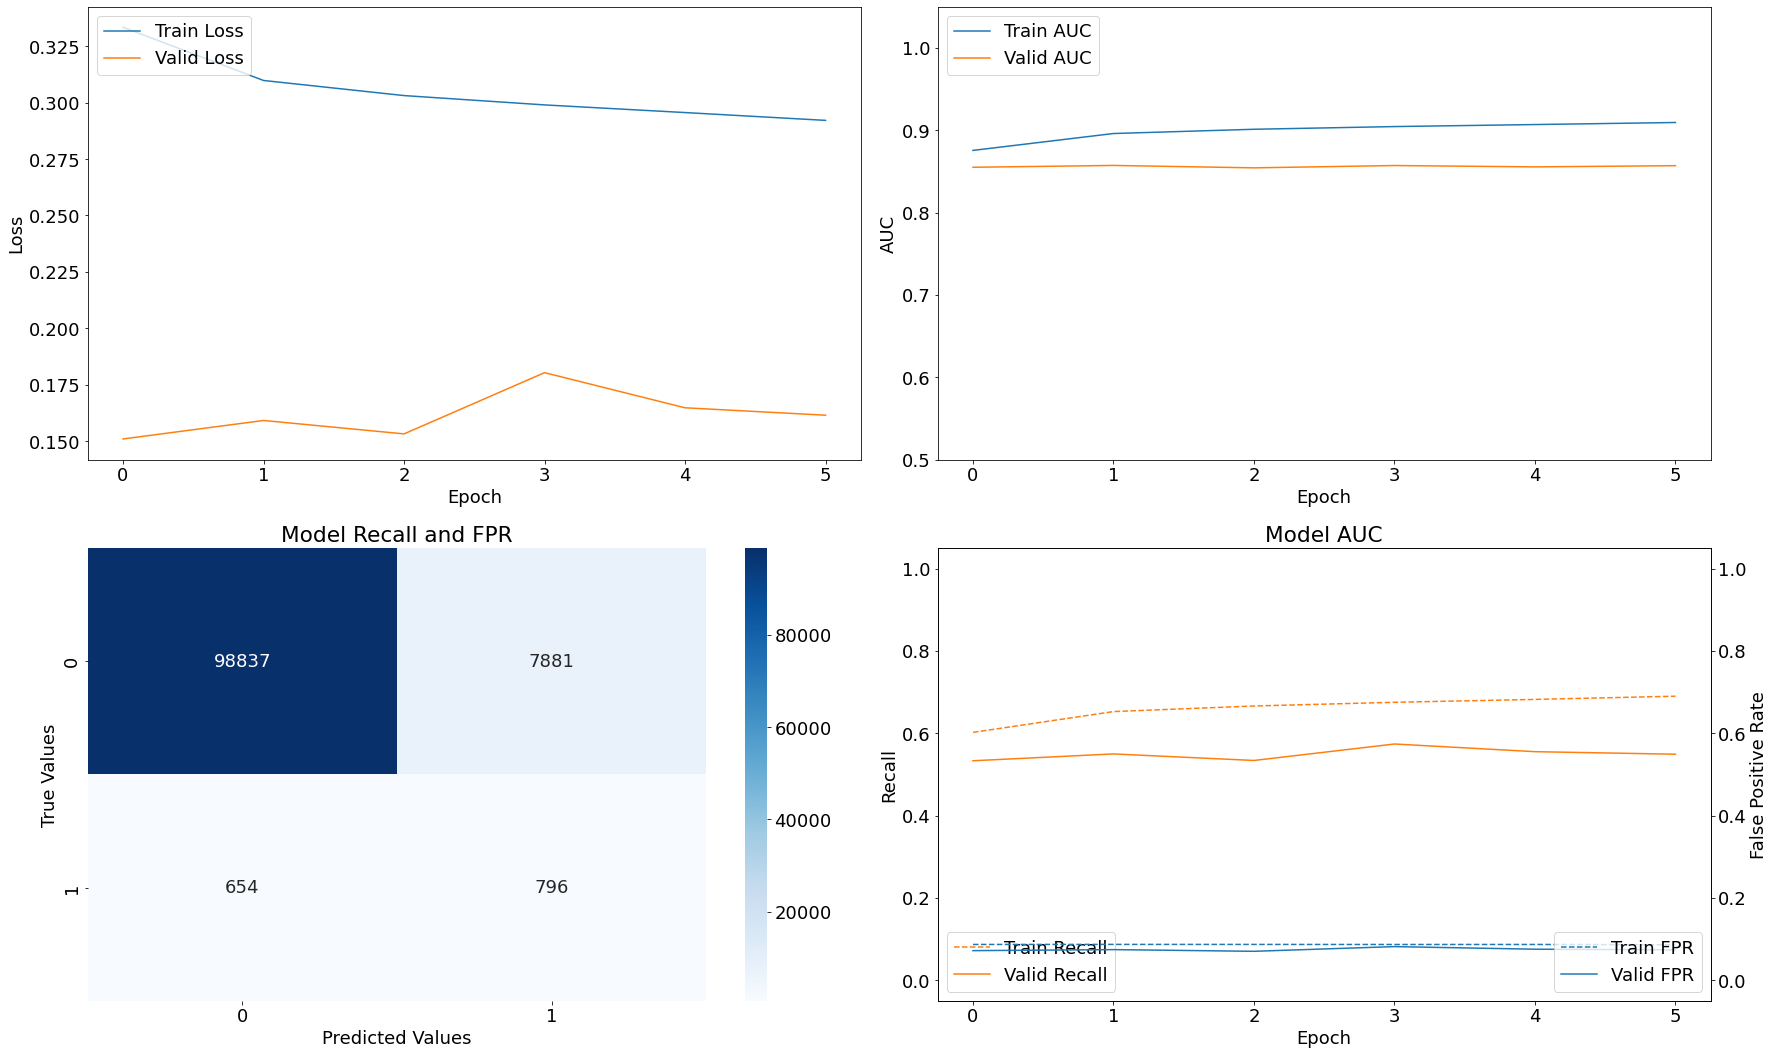

Epoch 00006: early stopping
Results for Variant I Model V6 with threshold = 0.3.

 Train f1: 0.6842443256282372 
 Val f1: 0.13474062087418448 

 Train Recall: 0.7884641885757446 
 Val Recall: 0.6206896305084229 

 Train FPR: 0.12904037535190582 
 Val FPR: 0.10315972566604614


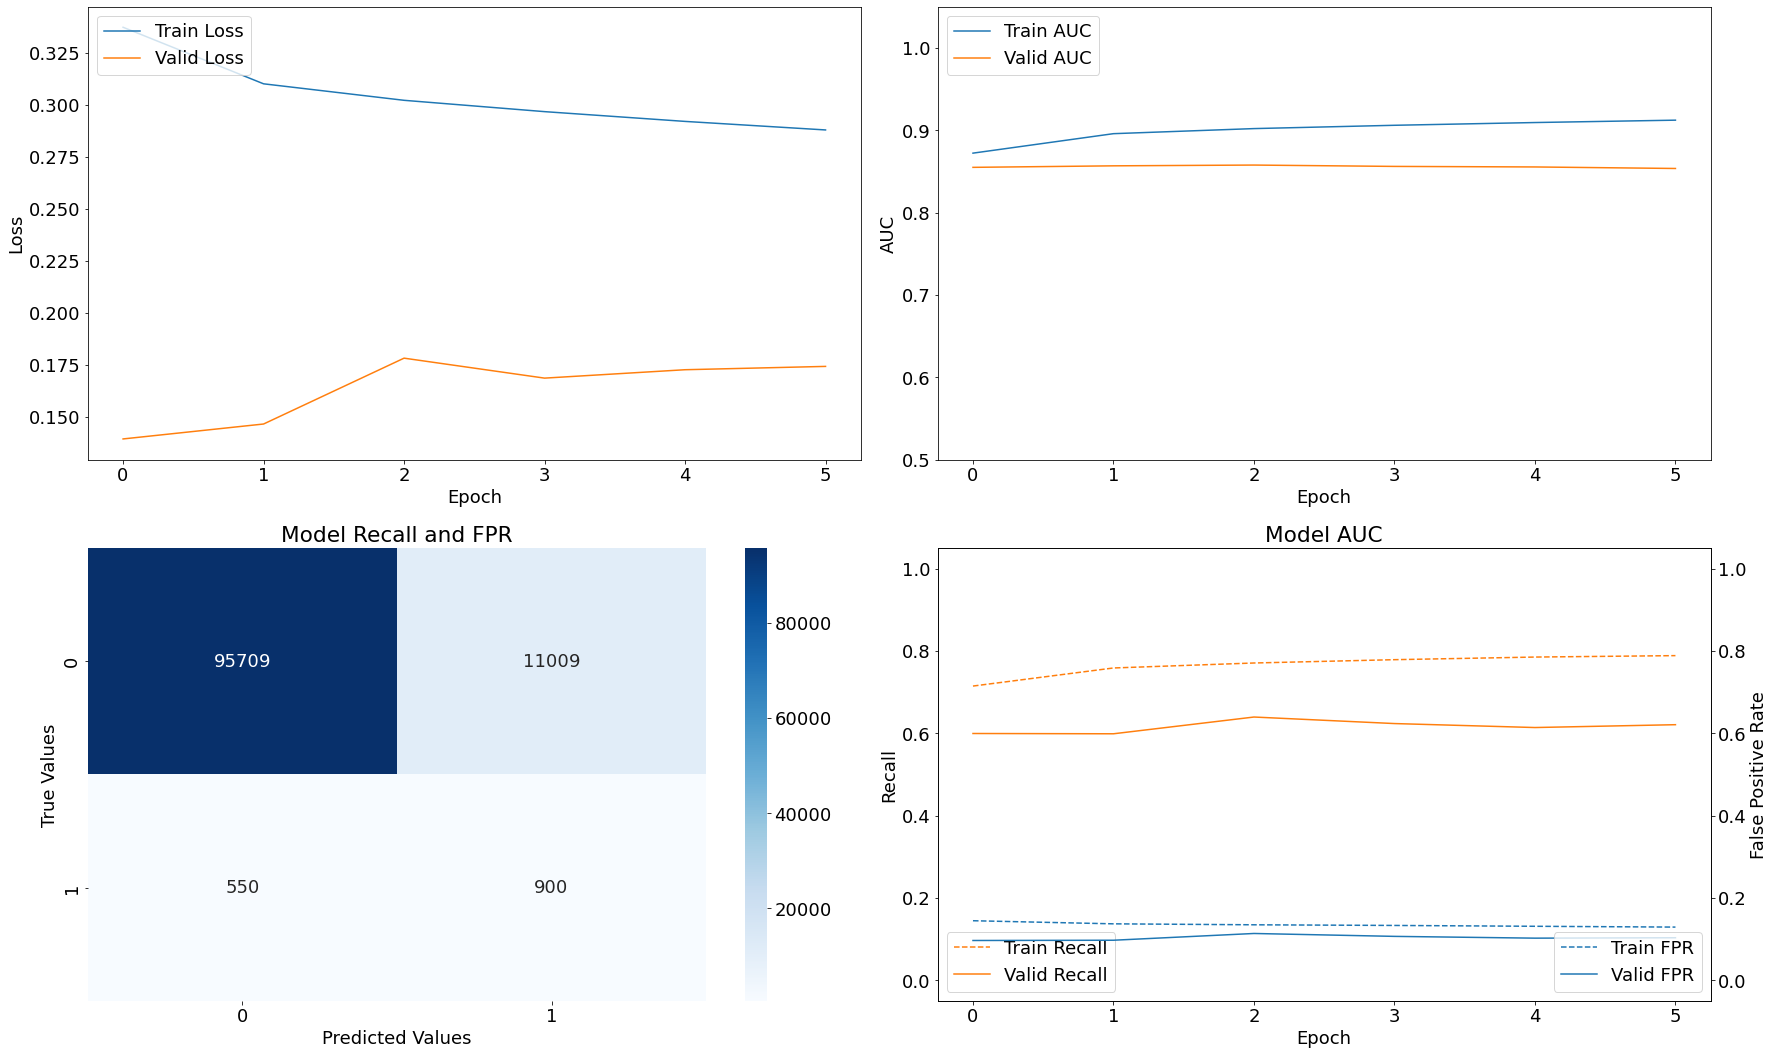

Epoch 00006: early stopping
Results for Variant I Model V6 with threshold = 0.2.

 Train f1: 0.6627748041770927 
 Val f1: 0.12371000584893595 

 Train Recall: 0.8663101196289062 
 Val Recall: 0.6572414040565491 

 Train FPR: 0.18696963787078857 
 Val FPR: 0.12185385823249817


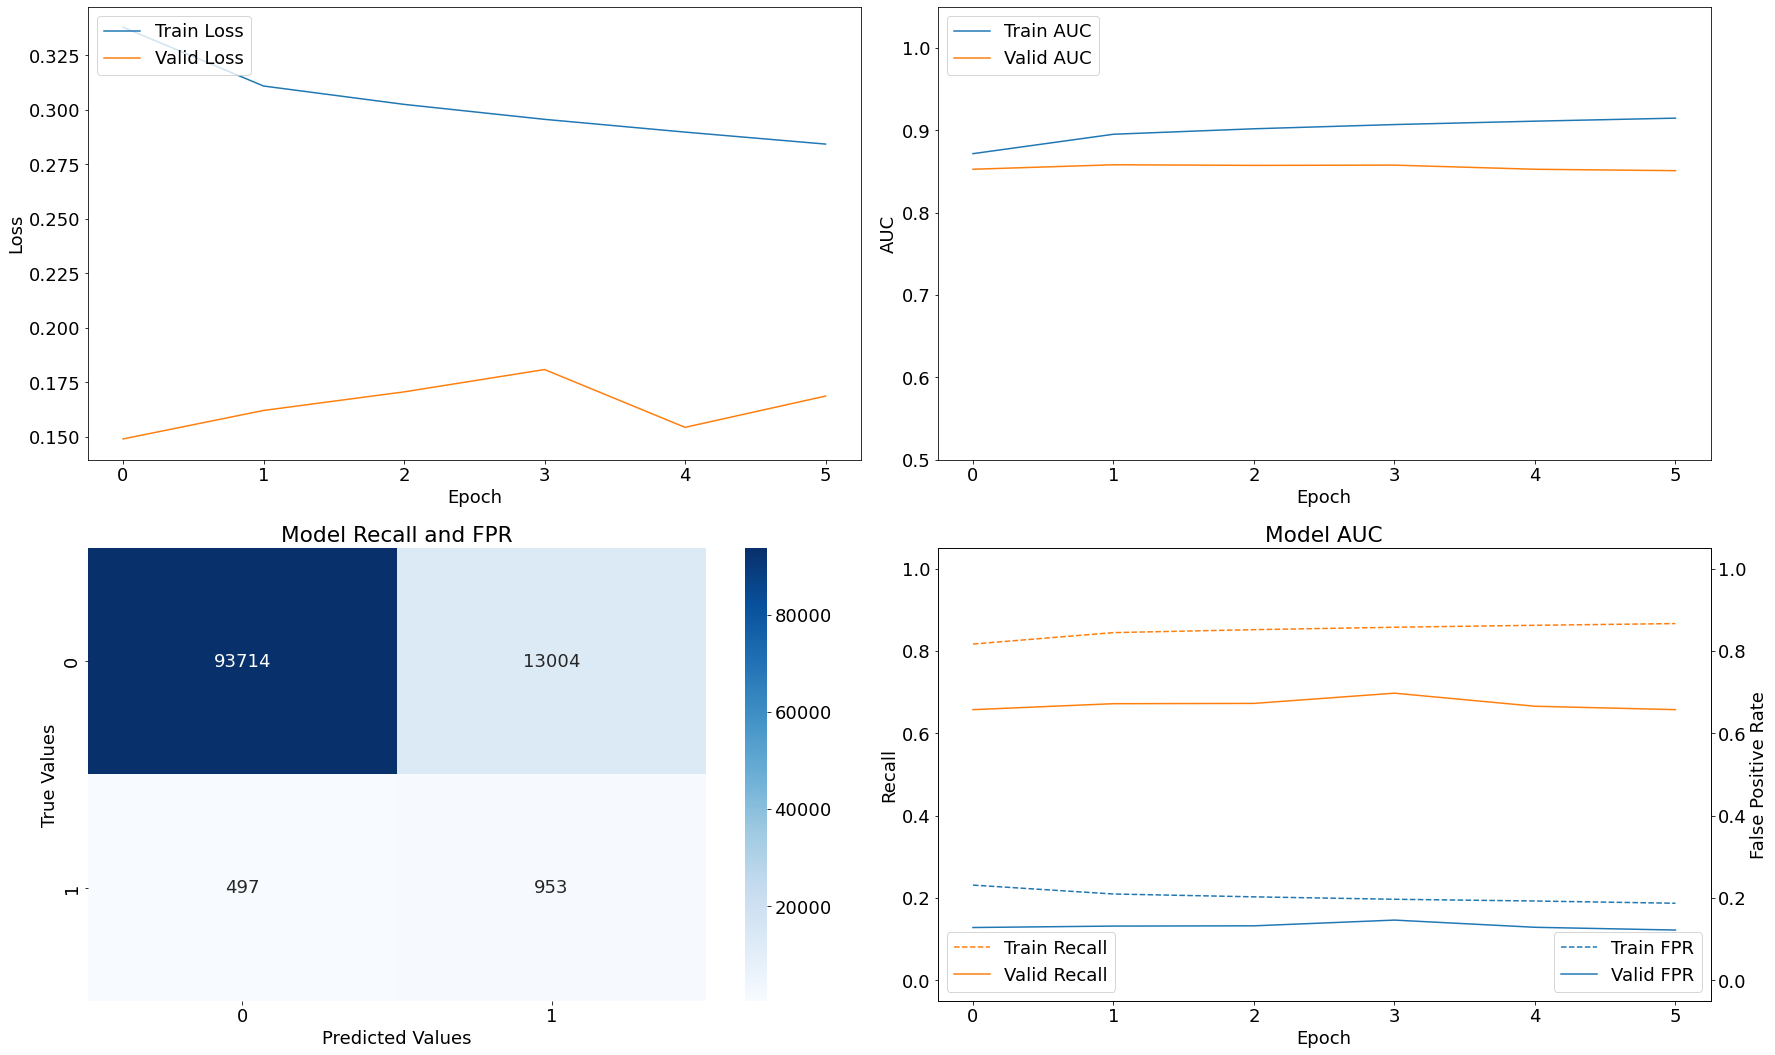

Epoch 00014: early stopping
Results for Variant I Model V6 with threshold = 0.1.

 Train f1: 0.6159352160701863 
 Val f1: 0.09556607917980531 

 Train Recall: 0.9348275661468506 
 Val Recall: 0.7655172348022461 

 Train FPR: 0.2751604914665222 
 Val FPR: 0.1936880350112915


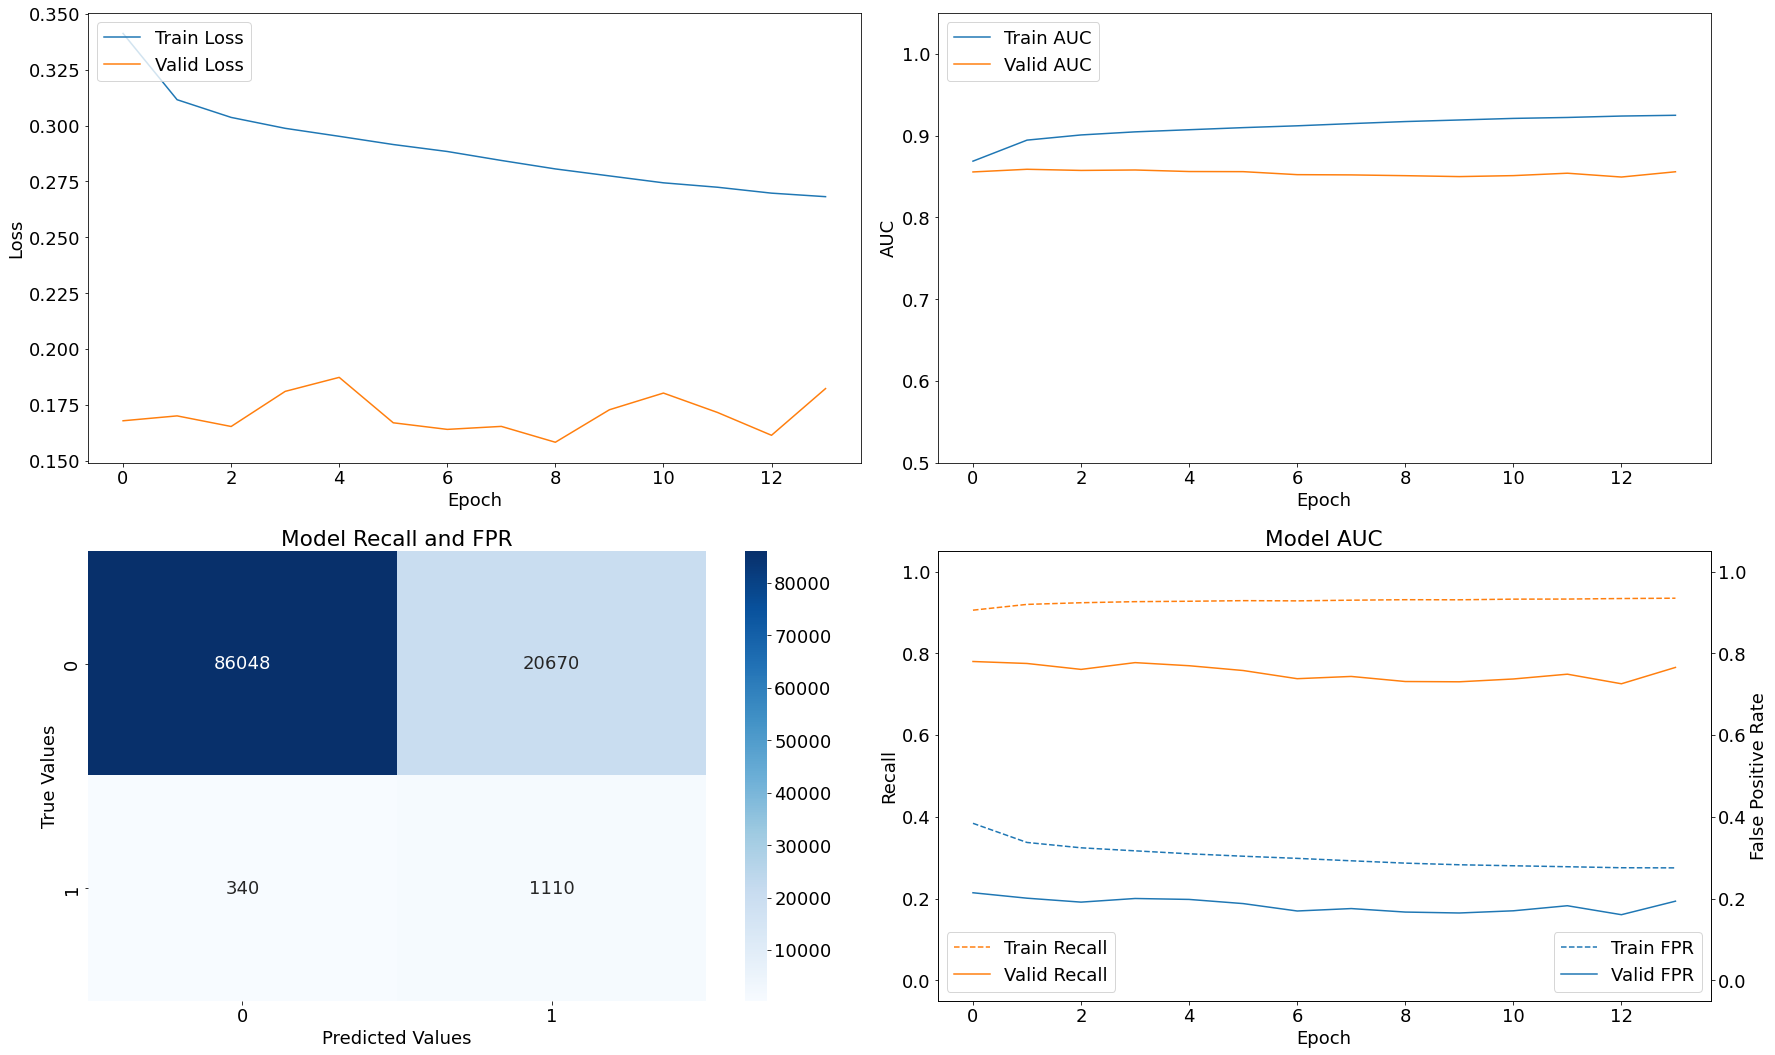

In [57]:
for t in thresholds:
    
    modelling_v6(X_train_v1_scaled_resampled,
                 y_train_v1_resampled,
                 X_val_v1_scaled,
                 y_val_v1,
                 'Variant I Model V6',
                 threshold=t)

---

### Seventh Model Iteration

In [58]:
def modelling_v7(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5): 

    model_v7 = models.Sequential()

    model_v7.add(layers.Input(shape=(n_features, )))
    model_v7.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.AlphaDropout(0.25))
    model_v7.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.AlphaDropout(0.25))
    model_v7.add(layers.Dense(1, activation='sigmoid'))

    model_v7.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v7_history = model_v7.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v7,
             name,
             model_v7_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00013: early stopping
Results for Variant I Model V7 with threshold = 0.5.

 Train f1: 0.4641097900969417 
 Val f1: 0.16977661400097577 

 Train Recall: 0.3527698218822479 
 Val Recall: 0.44551724195480347 

 Train FPR: 0.04185735434293747 
 Val FPR: 0.051668886095285416


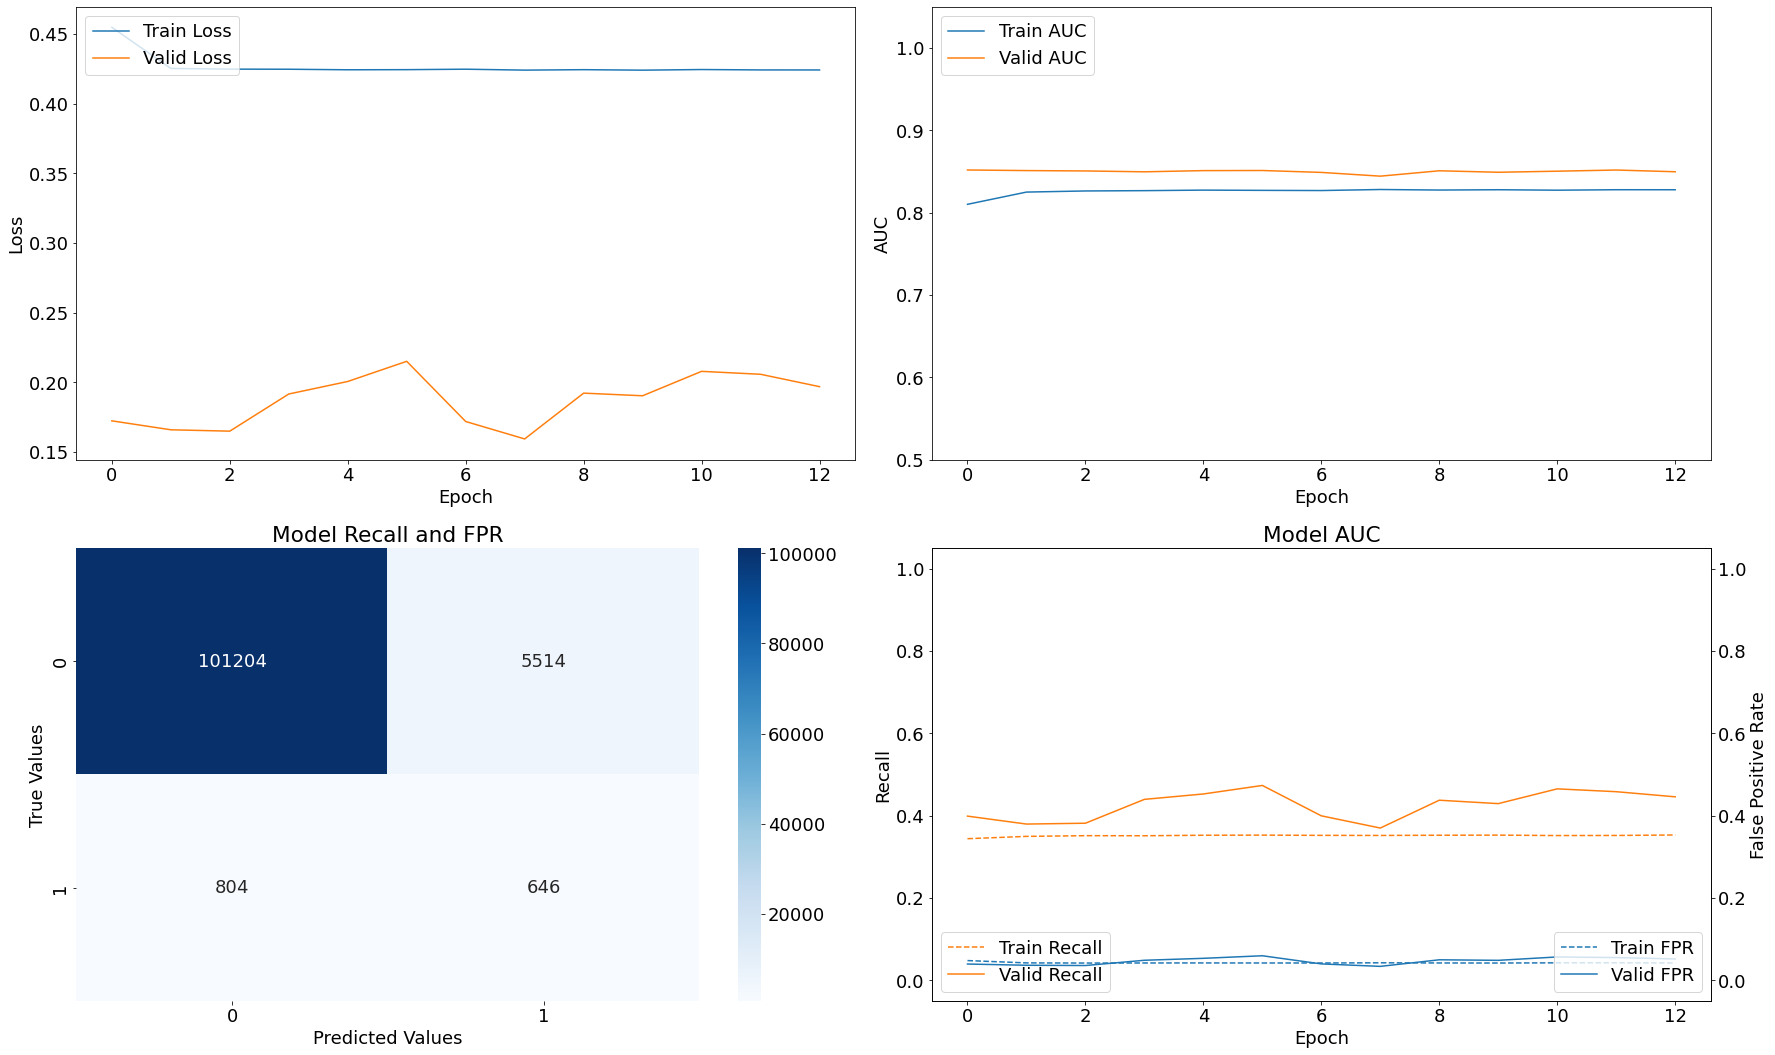

Epoch 00006: early stopping
Results for Variant I Model V7 with threshold = 0.4.

 Train f1: 0.5278179268711396 
 Val f1: 0.14633237538147917 

 Train Recall: 0.46895161271095276 
 Val Recall: 0.5413793325424194 

 Train FPR: 0.07699796557426453 
 Val FPR: 0.07959294319152832


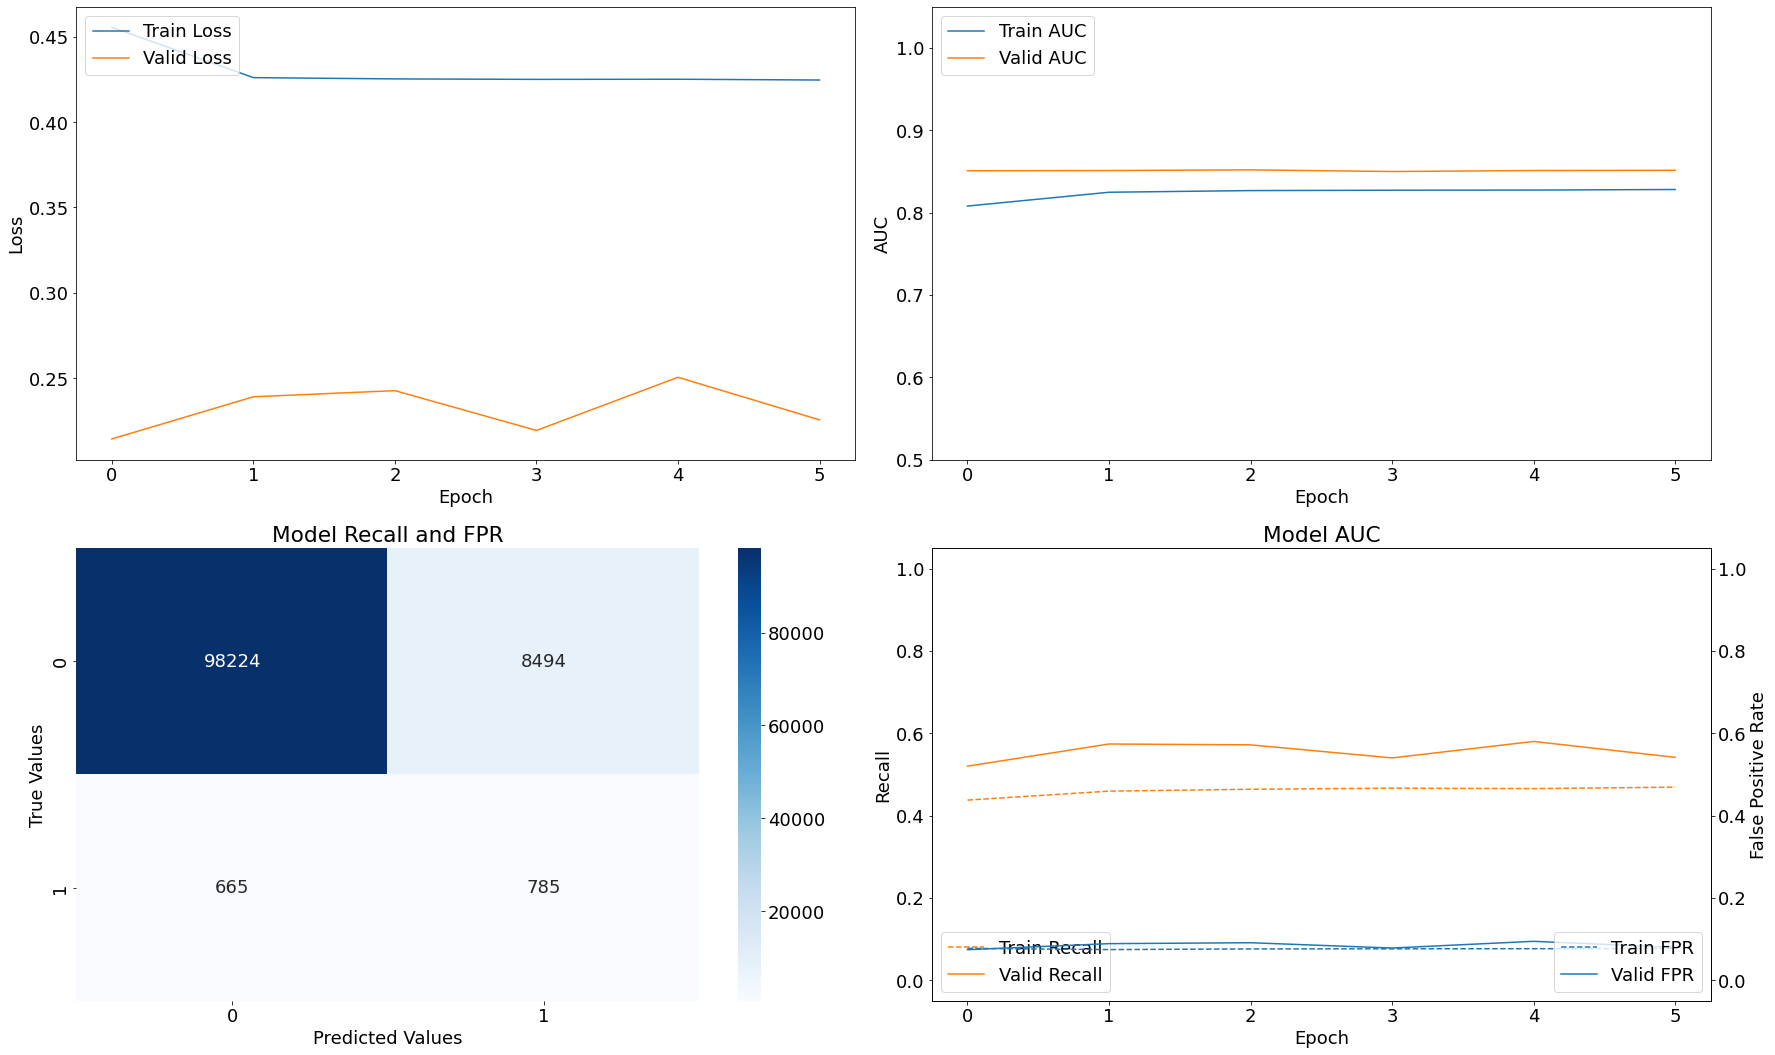

Epoch 00011: early stopping
Results for Variant I Model V7 with threshold = 0.3.

 Train f1: 0.5616550293955043 
 Val f1: 0.1307657809944779 

 Train Recall: 0.5938823223114014 
 Val Recall: 0.6041379570960999 

 Train FPR: 0.130218505859375 
 Val FPR: 0.1037500724196434


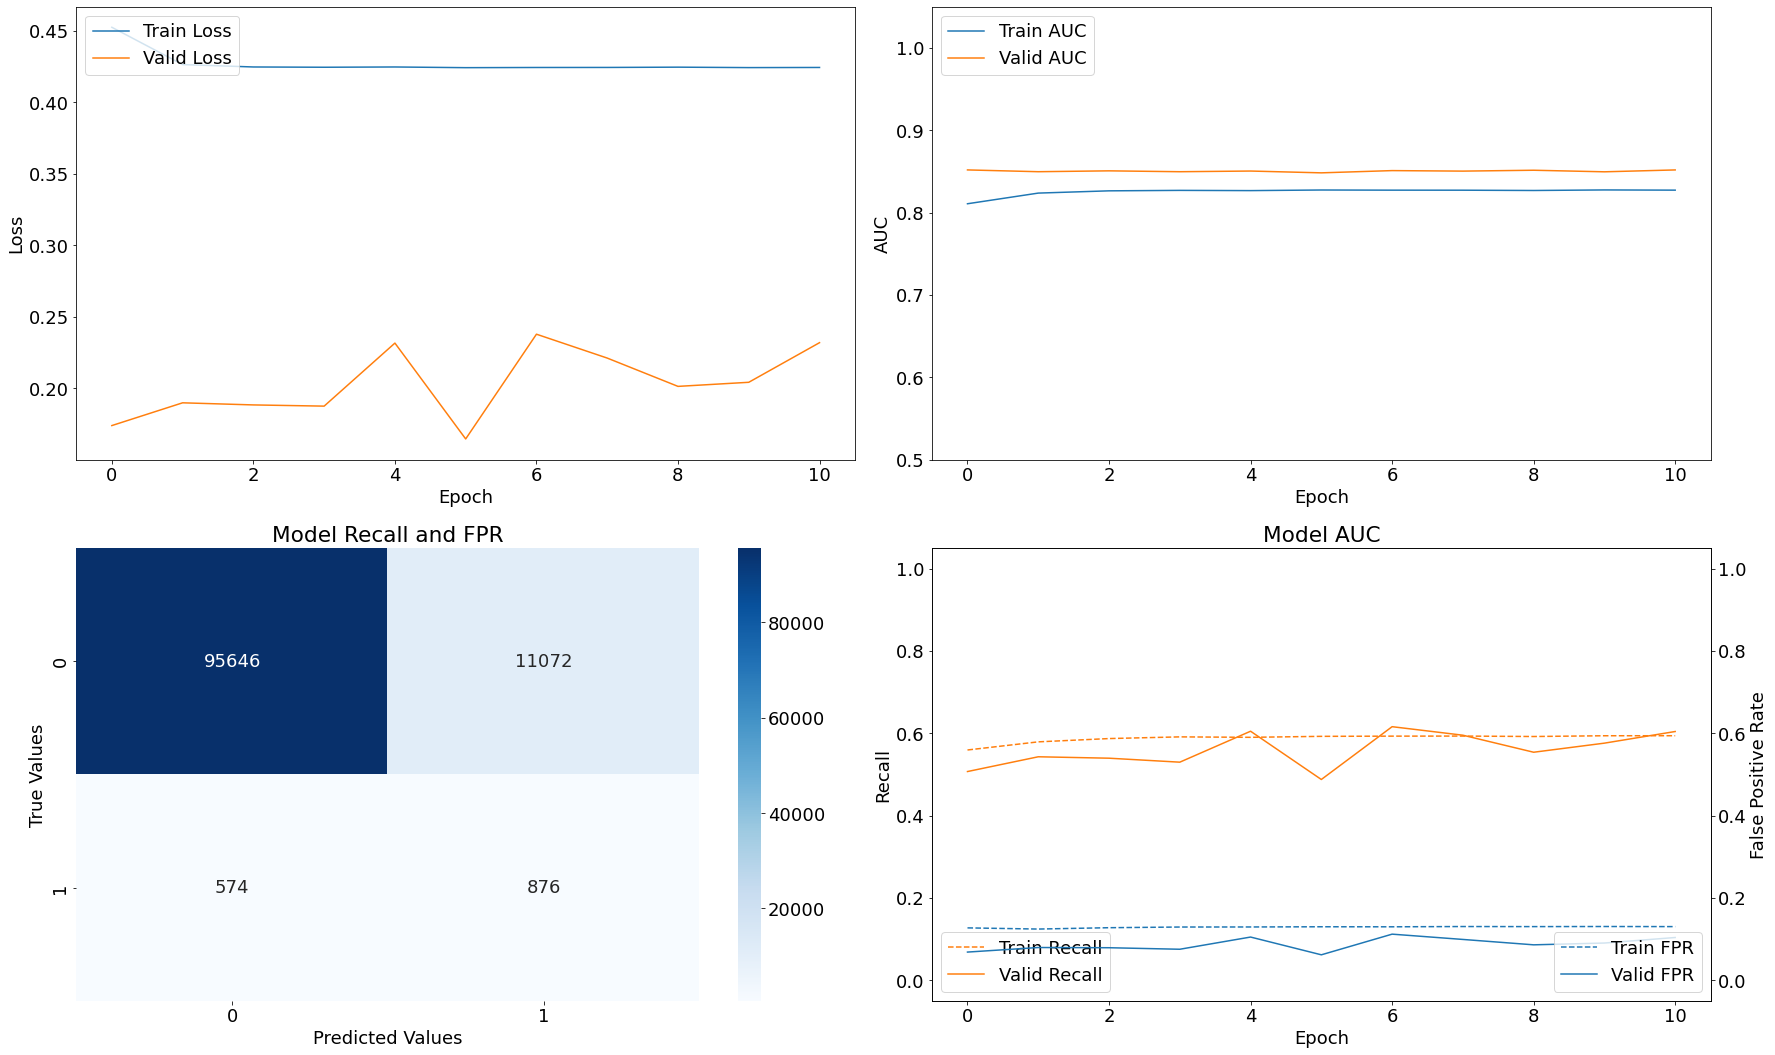

Epoch 00010: early stopping
Results for Variant I Model V7 with threshold = 0.2.

 Train f1: 0.547642971100987 
 Val f1: 0.10487405463126988 

 Train Recall: 0.7457208633422852 
 Val Recall: 0.6848275661468506 

 Train FPR: 0.24441467225551605 
 Val FPR: 0.15455687046051025


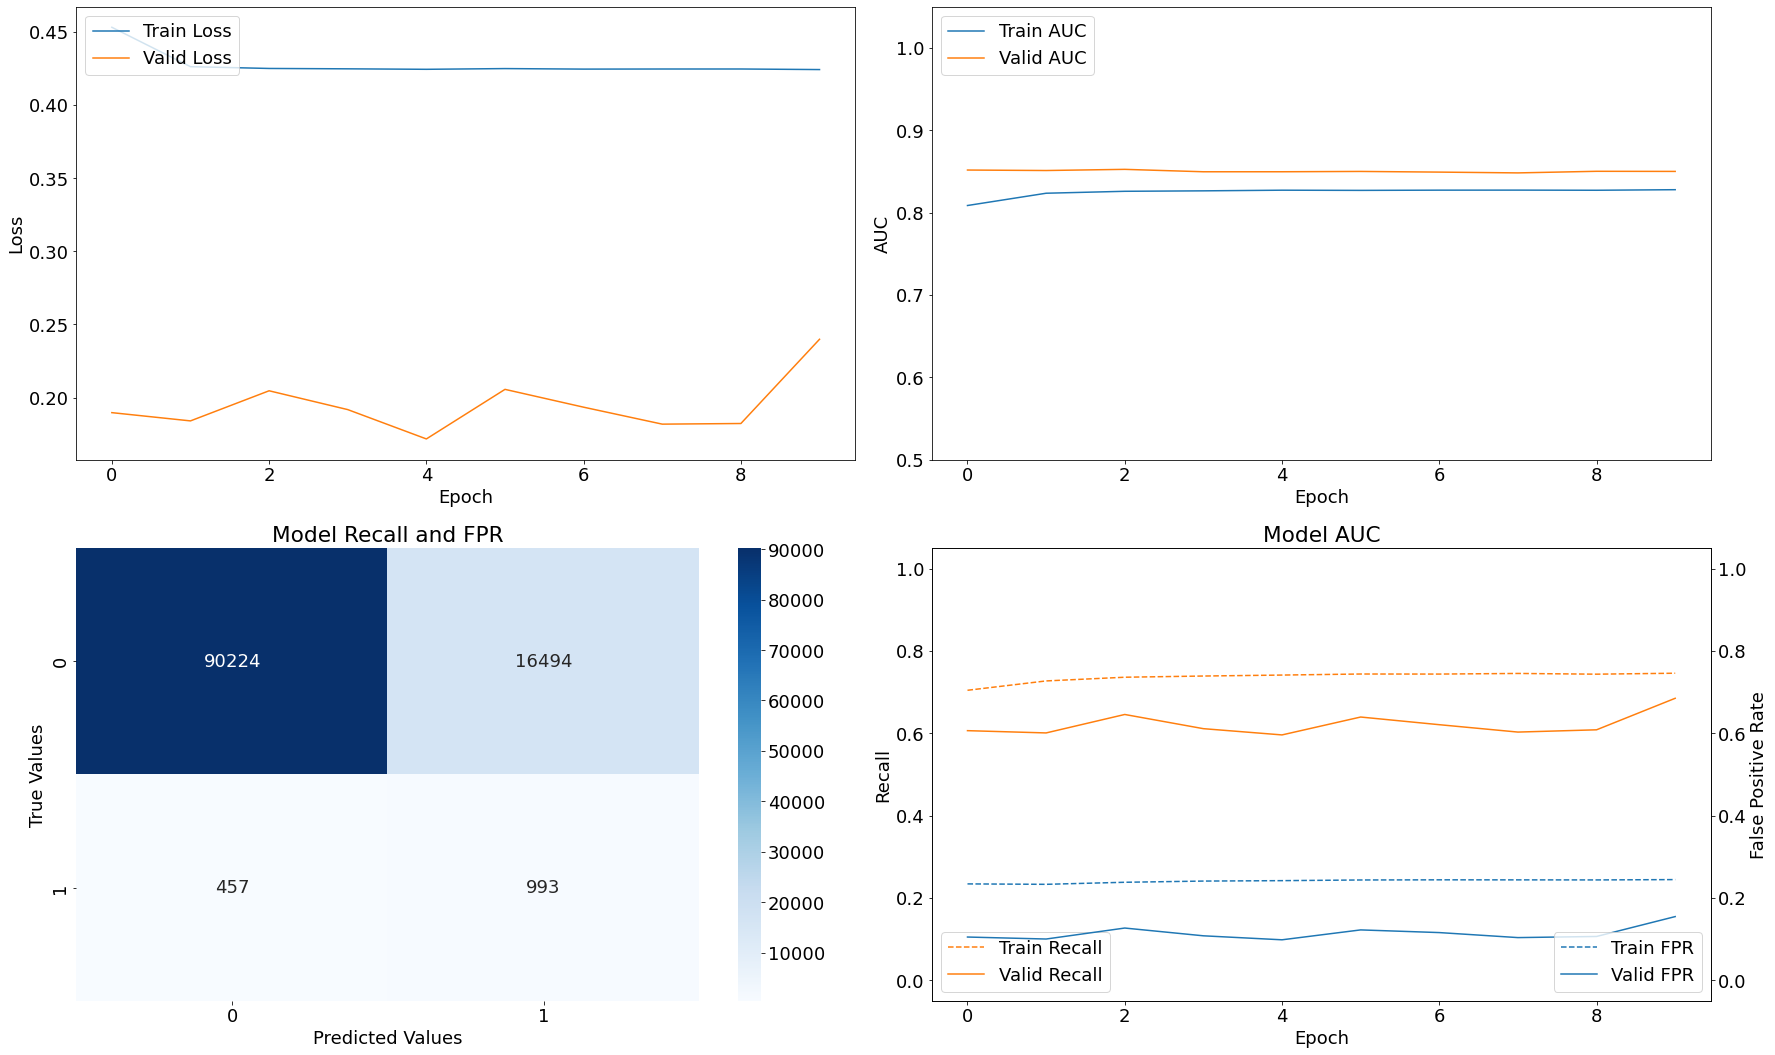

Epoch 00009: early stopping
Results for Variant I Model V7 with threshold = 0.1.

 Train f1: 0.4690098105628879 
 Val f1: 0.07862744184546616 

 Train Recall: 0.9024091362953186 
 Val Recall: 0.7917241454124451 

 Train FPR: 0.48643243312835693 
 Val FPR: 0.24928316473960876


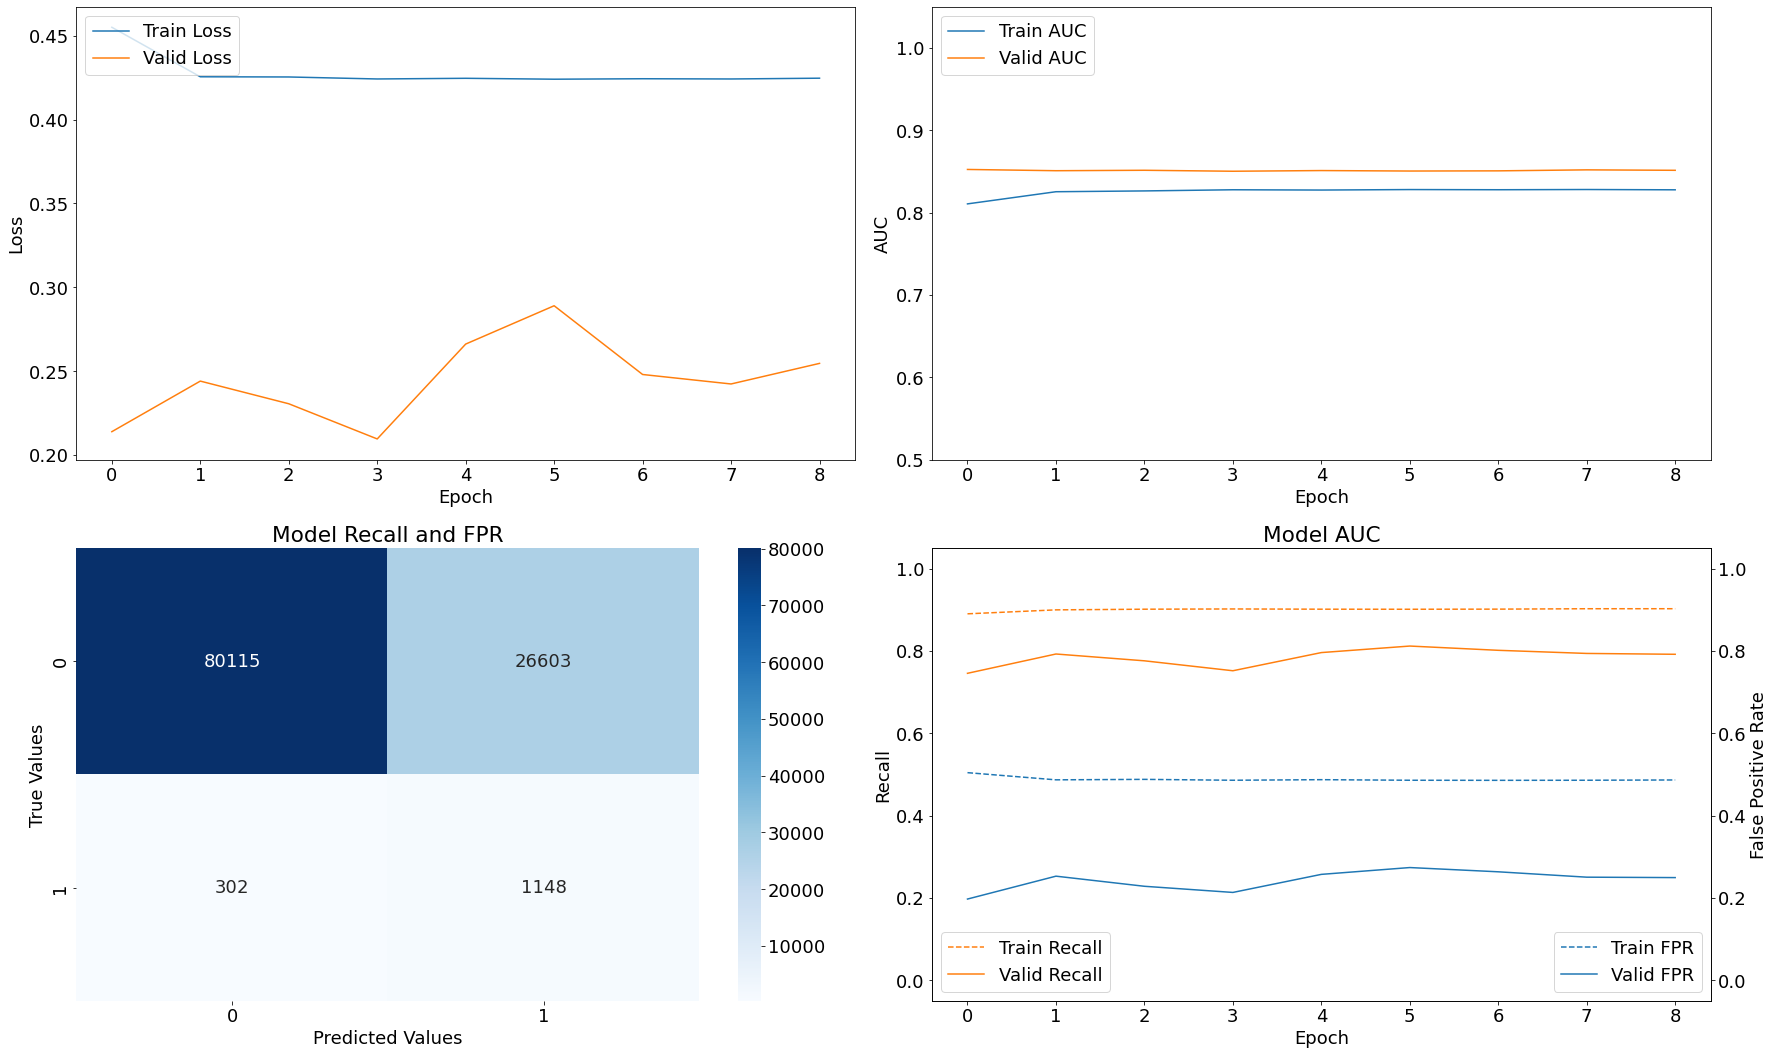

In [59]:
for t in thresholds:
    
    modelling_v7(X_train_v1_scaled_resampled,
                 y_train_v1_resampled,
                 X_val_v1_scaled,
                 y_val_v1,
                 'Variant I Model V7',
                 threshold=t)

---

### Eighth Model Iteration

In [60]:
def modelling_v8(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):   
    
    model_v8 = models.Sequential()

    model_v8.add(layers.Input(shape=(n_features, )))
    model_v8.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(8,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(4,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.Dense(1, activation='sigmoid'))

    model_v8.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v8_history = model_v8.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    verbose=0).history
    
    evaluate(model_v8,
             name,
             model_v8_history,
             X_val,
             y_val,
             threshold=threshold)

Results for Variant I Model V8 with threshold = 0.5.

 Train f1: 0.4130410628742554 
 Val f1: 0.14091534954201704 

 Train Recall: 0.30347365140914917 
 Val Recall: 0.564827561378479 

 Train FPR: 0.04149641841650009 
 Val FPR: 0.08766093850135803


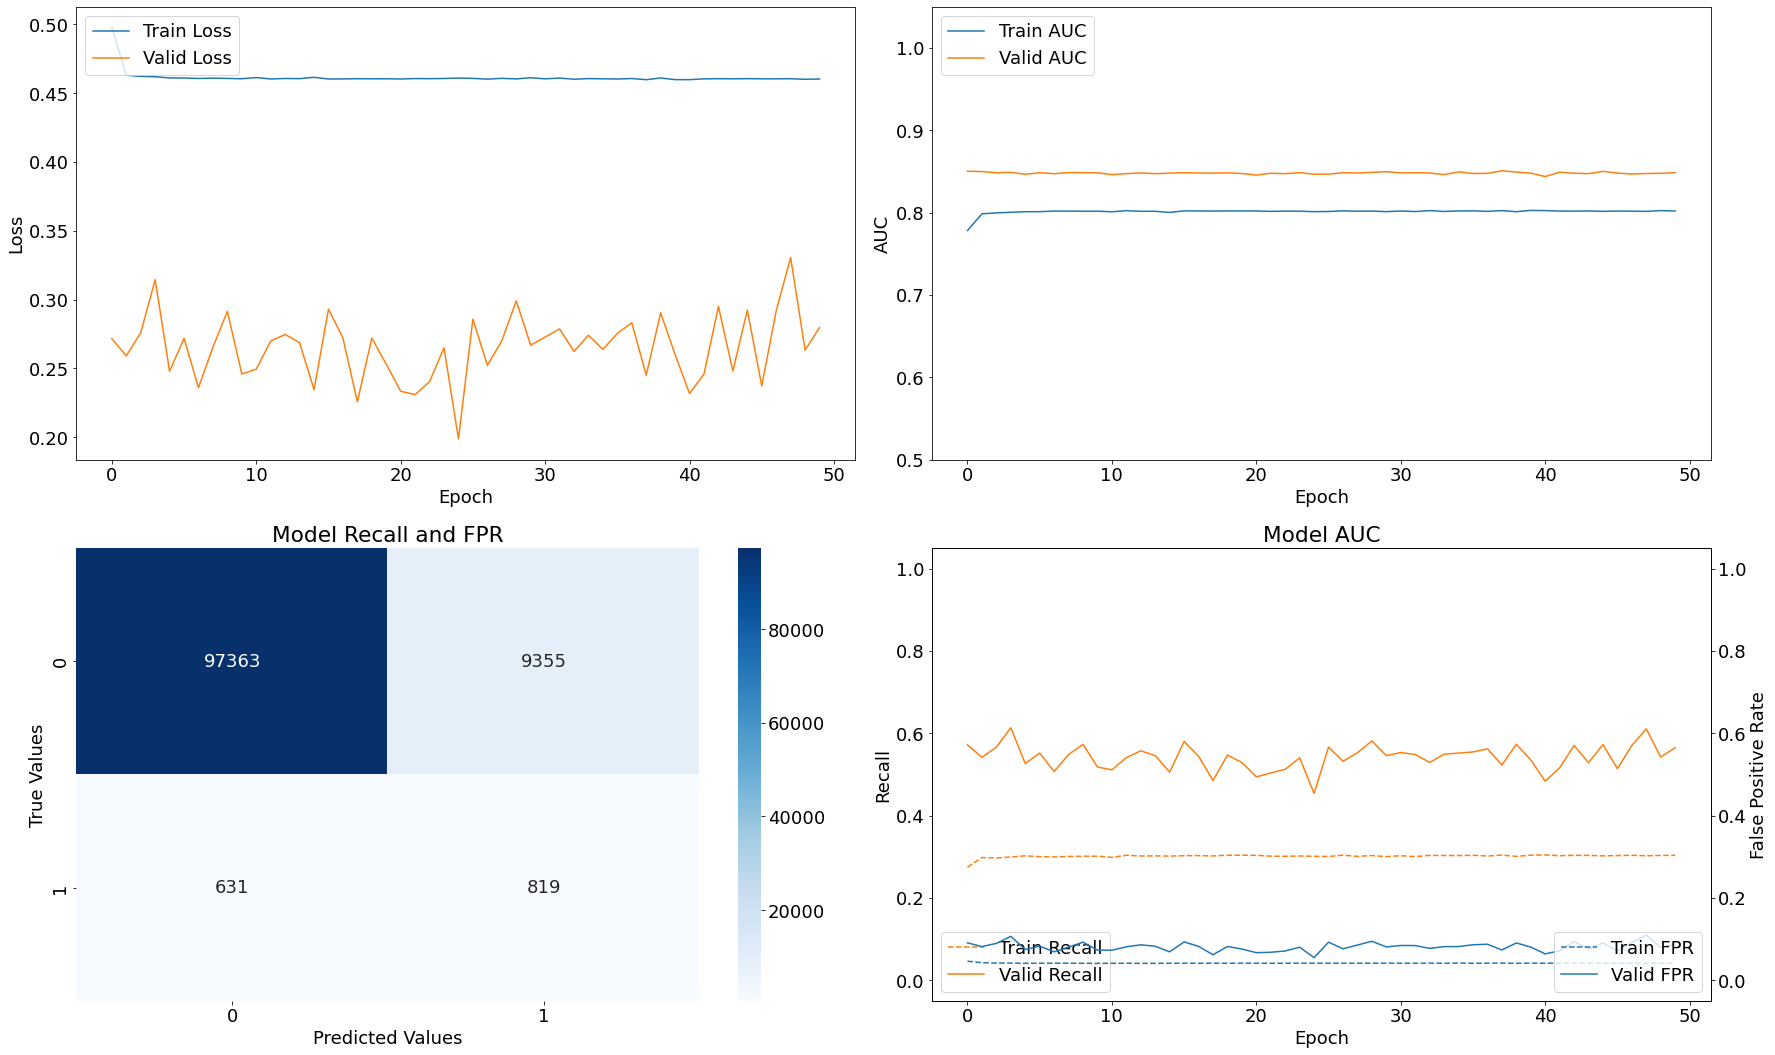

Results for Variant I Model V8 with threshold = 0.4.

 Train f1: 0.4917983364002947 
 Val f1: 0.1147711322925795 

 Train Recall: 0.43019384145736694 
 Val Recall: 0.6475862264633179 

 Train FPR: 0.07981938123703003 
 Val FPR: 0.13094323873519897


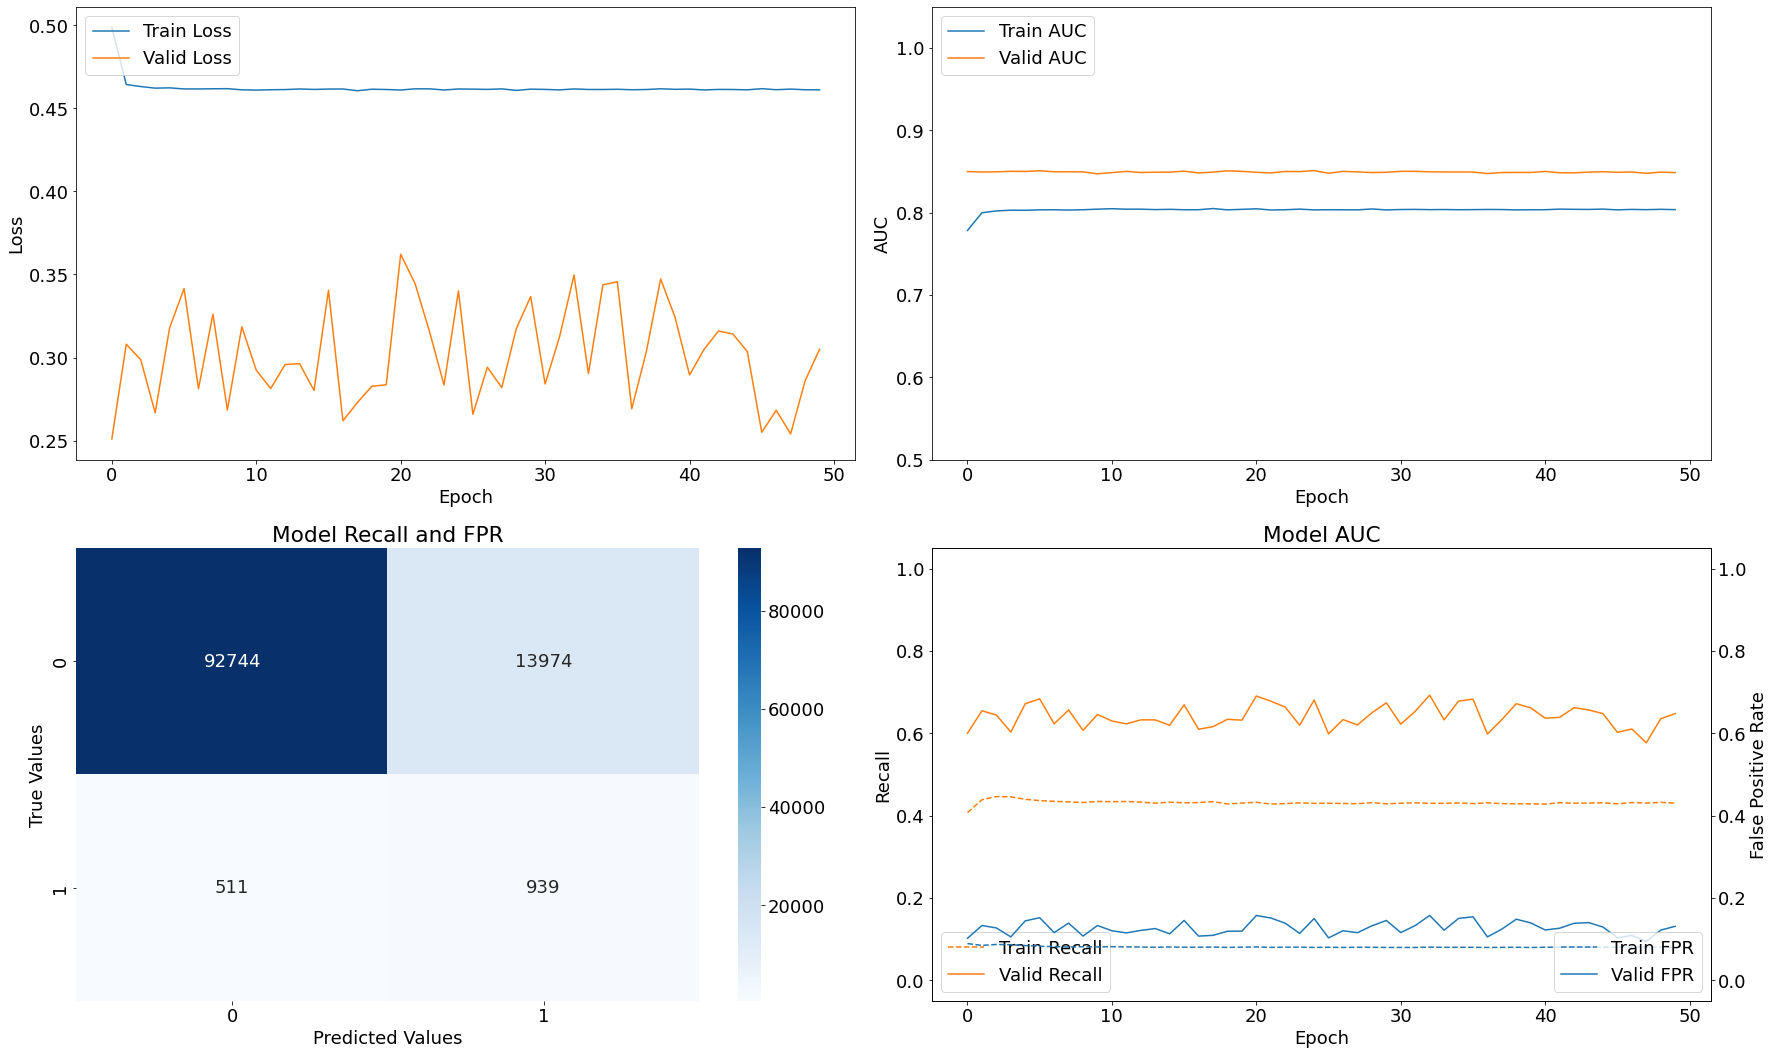

Results for Variant I Model V8 with threshold = 0.3.

 Train f1: 0.5309640906212602 
 Val f1: 0.09605250692126614 

 Train Recall: 0.5672134757041931 
 Val Recall: 0.7165517210960388 

 Train FPR: 0.14233152568340302 
 Val FPR: 0.1793980449438095


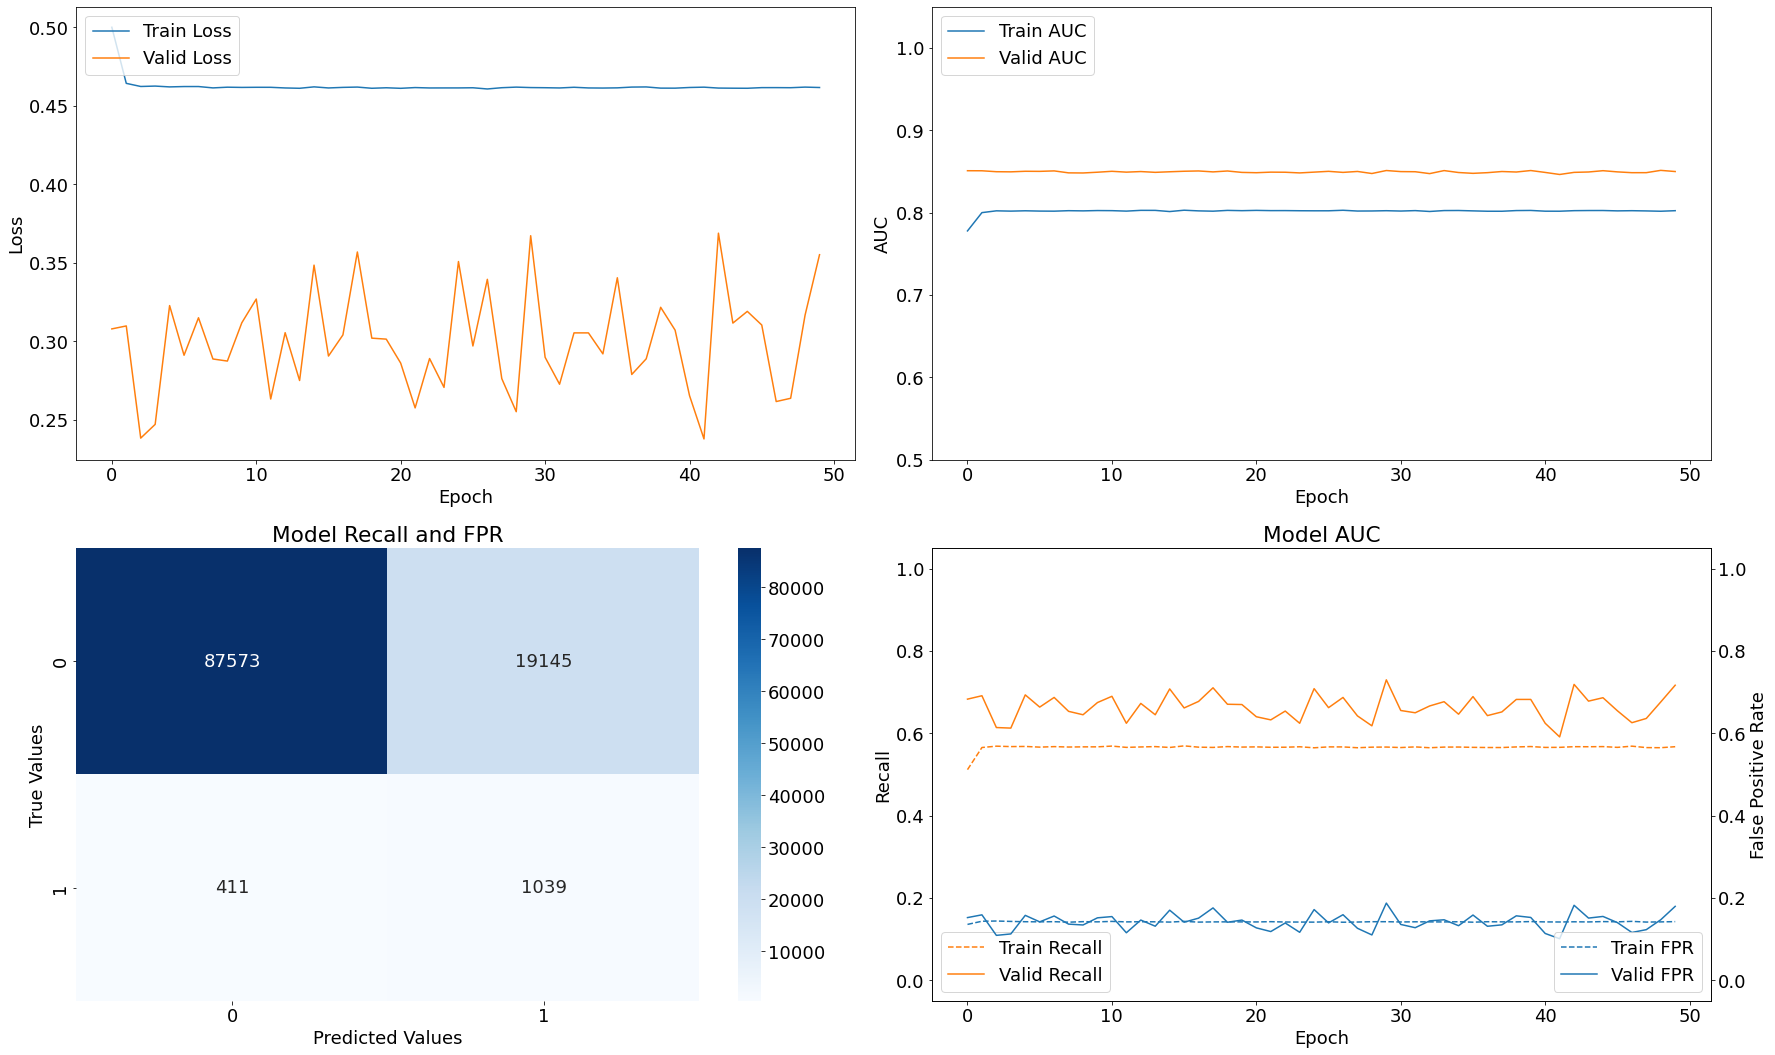

Results for Variant I Model V8 with threshold = 0.2.

 Train f1: 0.5256234257780016 
 Val f1: 0.10820478394768777 

 Train Recall: 0.7017980813980103 
 Val Recall: 0.6675862073898315 

 Train FPR: 0.2421359419822693 
 Val FPR: 0.1449989676475525


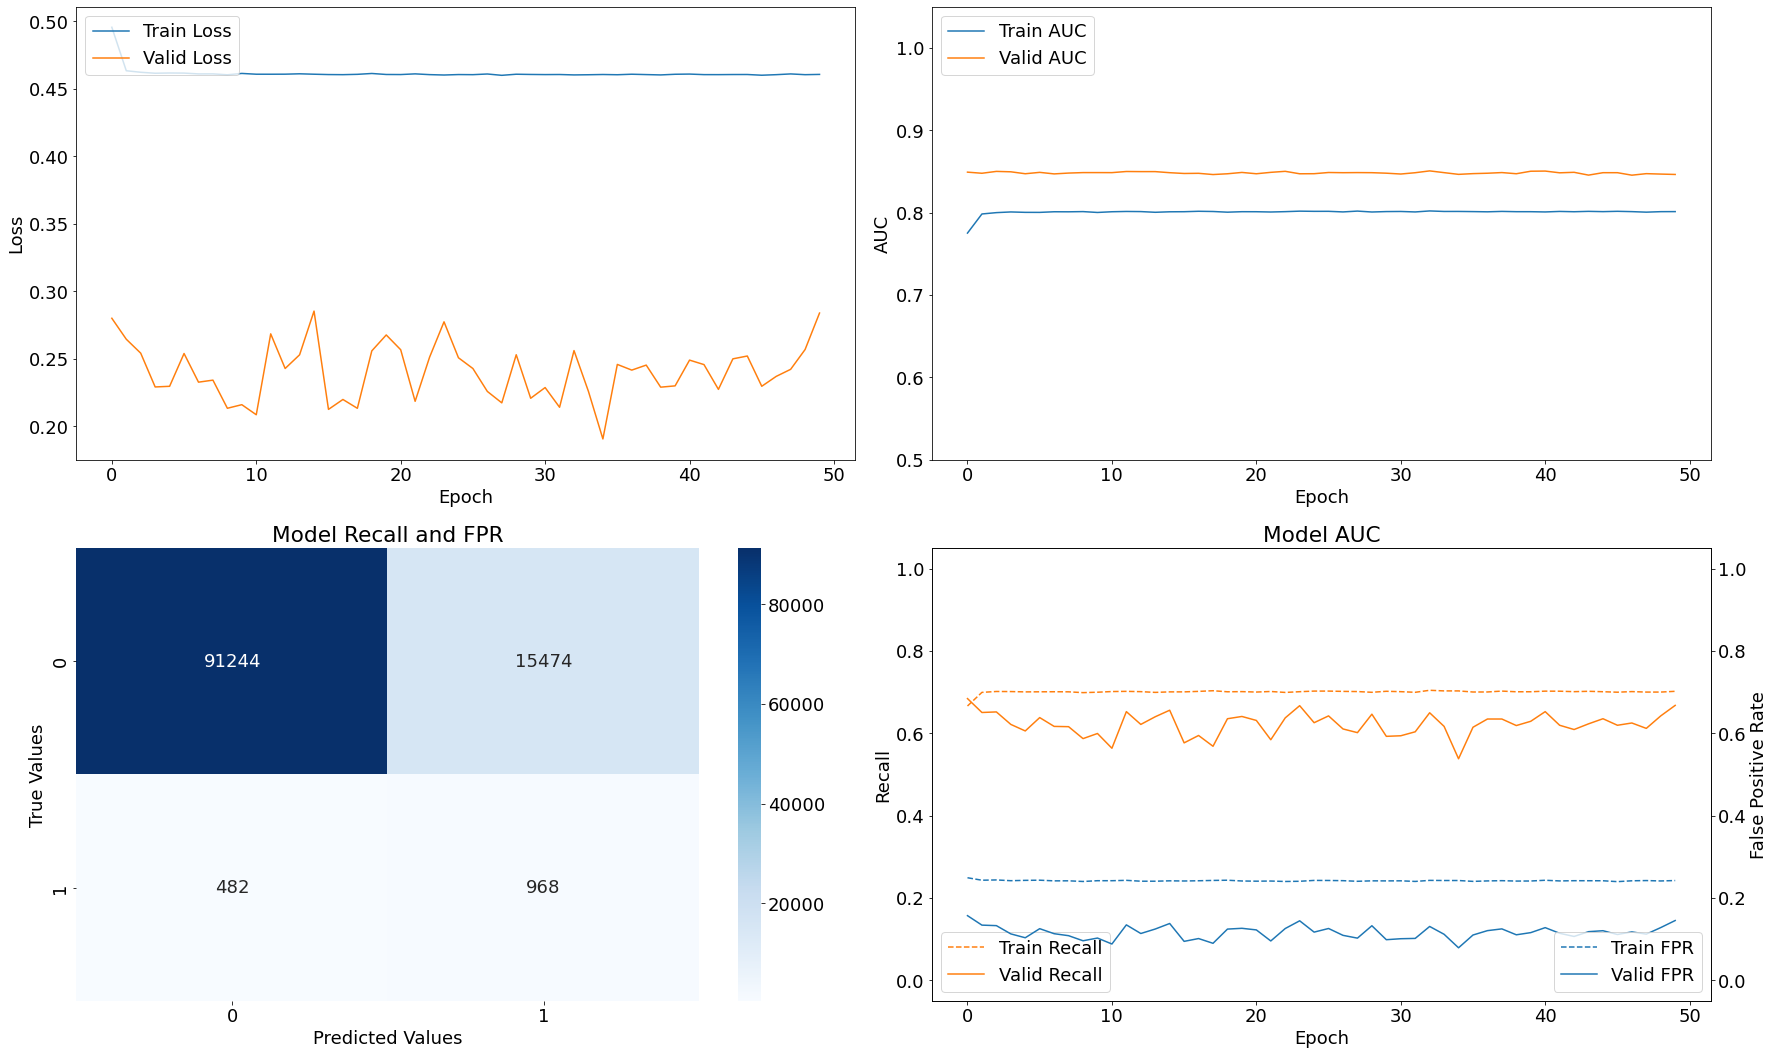

Results for Variant I Model V8 with threshold = 0.1.

 Train f1: 0.445573863419639 
 Val f1: 0.10791366663100767 

 Train Recall: 0.8873615264892578 
 Val Recall: 0.682758629322052 

 Train FPR: 0.5239089727401733 
 Val FPR: 0.149065762758255


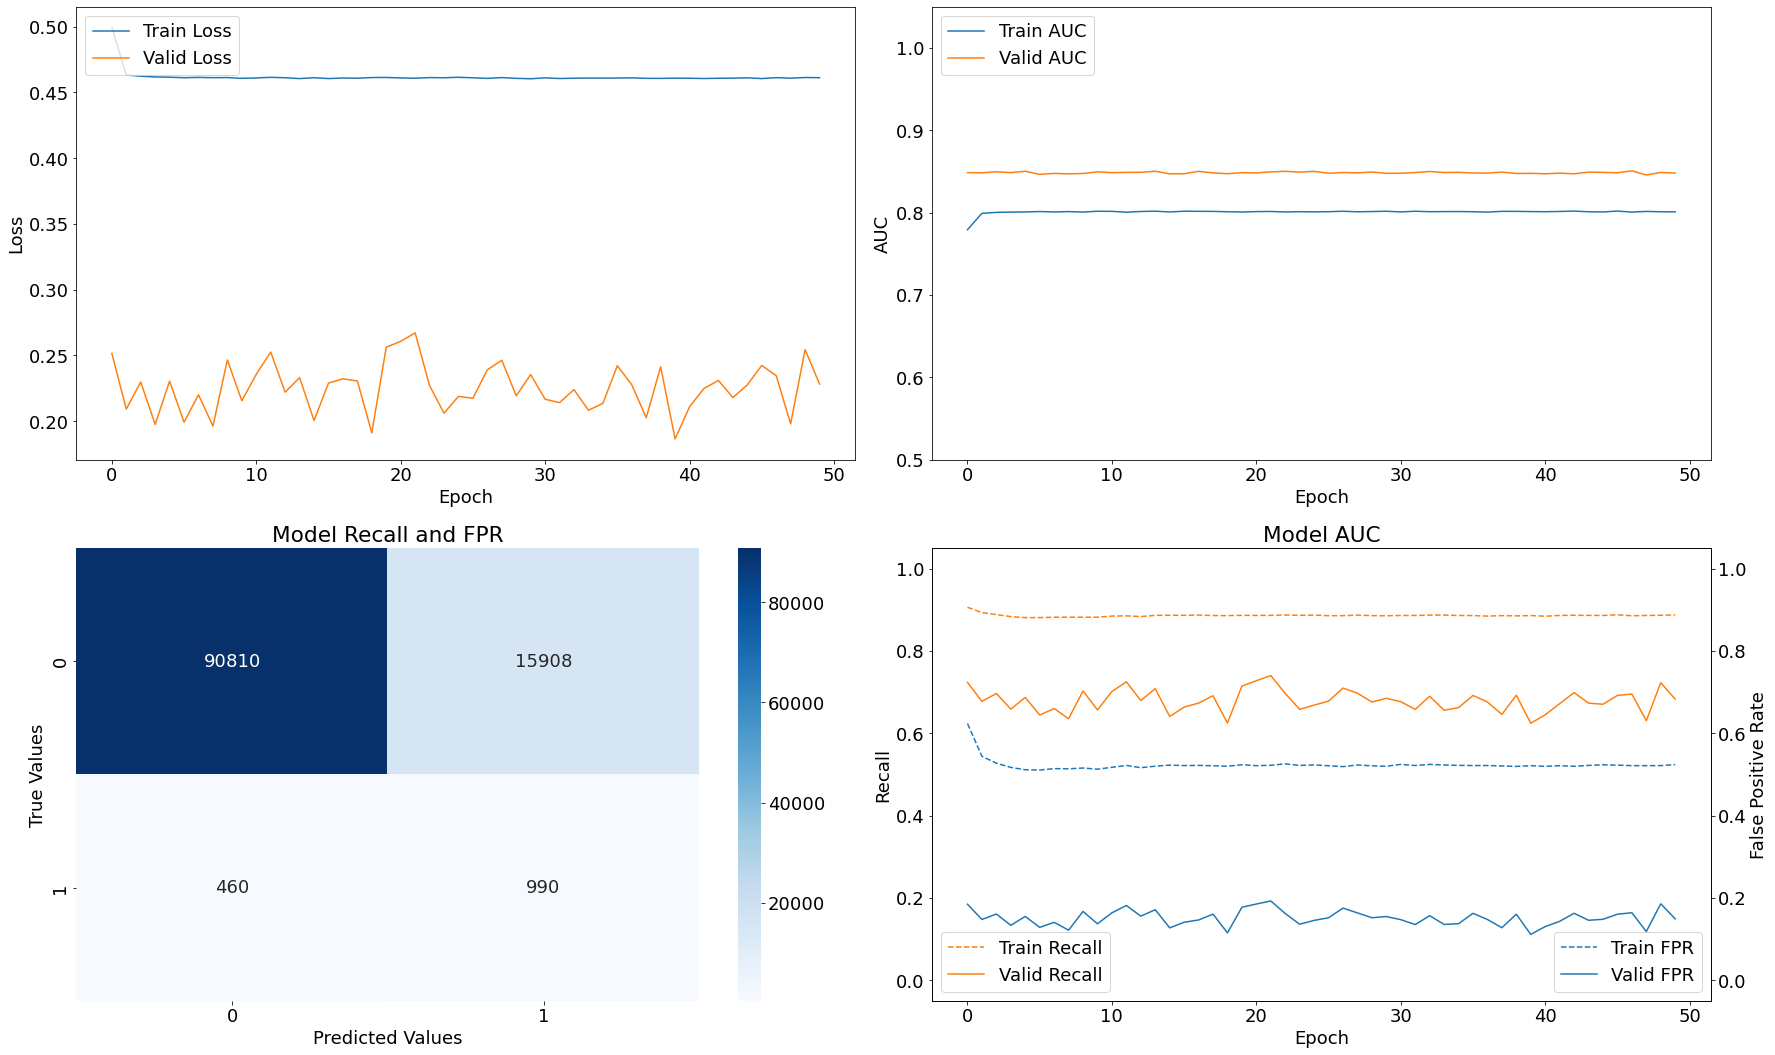

In [61]:
for t in thresholds:
    
    modelling_v8(X_train_v1_scaled_resampled,
                 y_train_v1_resampled,
                 X_val_v1_scaled,
                 y_val_v1,
                 'Variant I Model V8',
                 threshold=t)

---

### Ninth Model Iteration

In [62]:
def modelling_v9(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v9 = models.Sequential()

    model_v9.add(layers.Input(shape=(n_features, )))
    model_v9.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(8,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(4,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.Dense(1, activation='sigmoid'))

    model_v9.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v9_history = model_v9.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v9,
             name,
             model_v9_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00006: early stopping
Results for Variant I Model V9 with threshold = 0.5.

 Train f1: 0.5004237116911929 
 Val f1: 0.11621856344368699 

 Train Recall: 0.4022744297981262 
 Val Recall: 0.6468965411186218 

 Train FPR: 0.051365017890930176 
 Val FPR: 0.12888172268867493


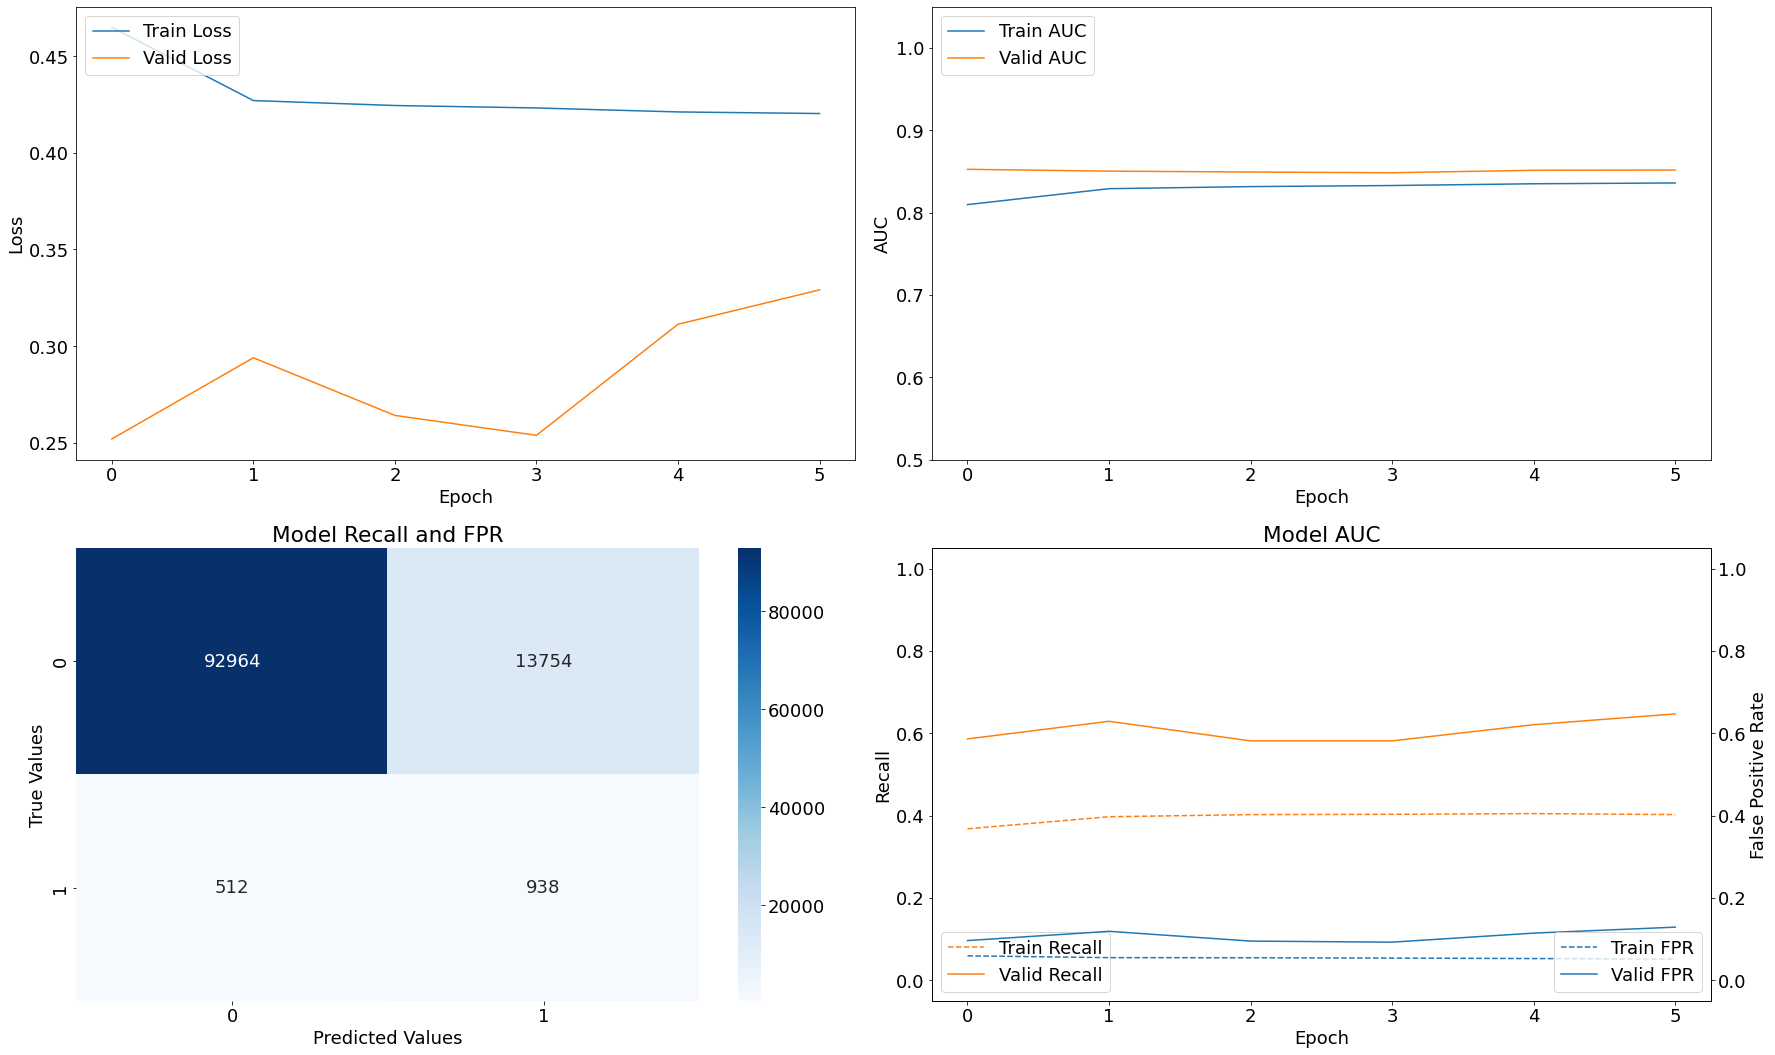

Epoch 00006: early stopping
Results for Variant I Model V9 with threshold = 0.4.

 Train f1: 0.5458868250404704 
 Val f1: 0.11074618234041961 

 Train Recall: 0.49958568811416626 
 Val Recall: 0.6627586483955383 

 Train FPR: 0.0826941728591919 
 Val FPR: 0.1400326043367386


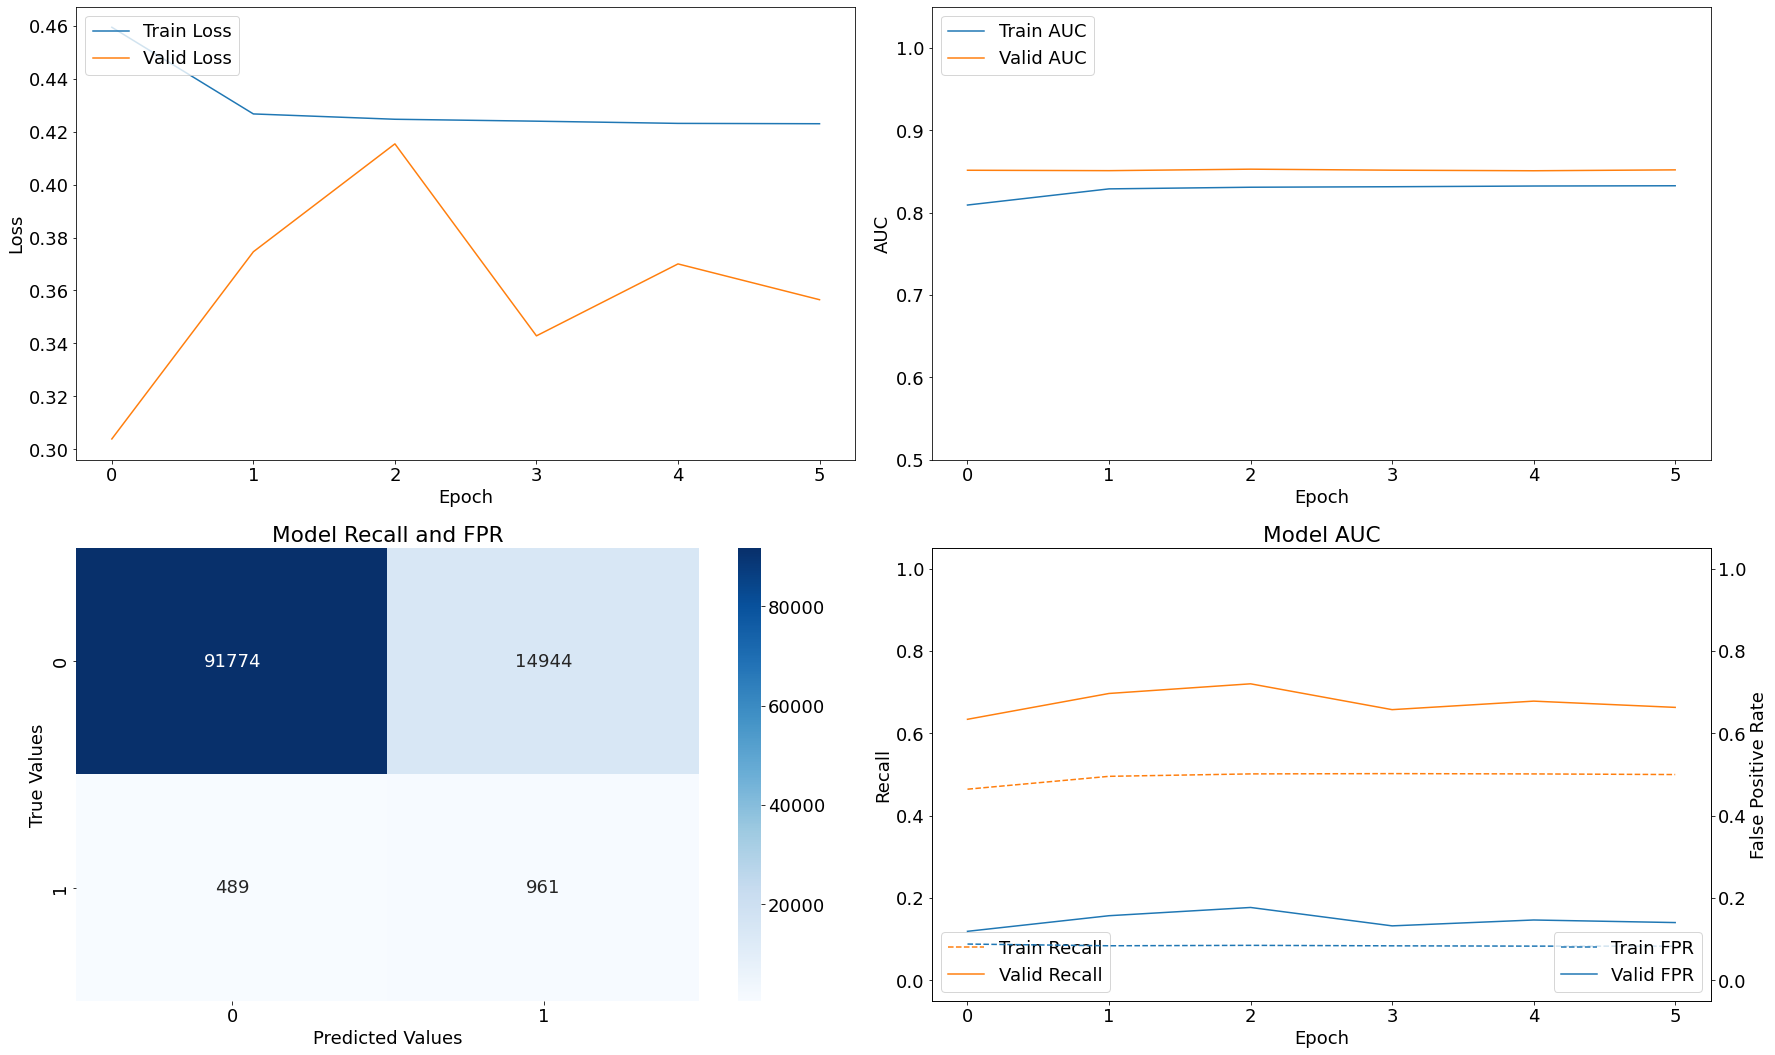

Epoch 00010: early stopping
Results for Variant I Model V9 with threshold = 0.3.

 Train f1: 0.5804486360625073 
 Val f1: 0.11020291779258262 

 Train Recall: 0.6281512379646301 
 Val Recall: 0.6648275852203369 

 Train FPR: 0.1340528428554535 
 Val FPR: 0.14131636917591095


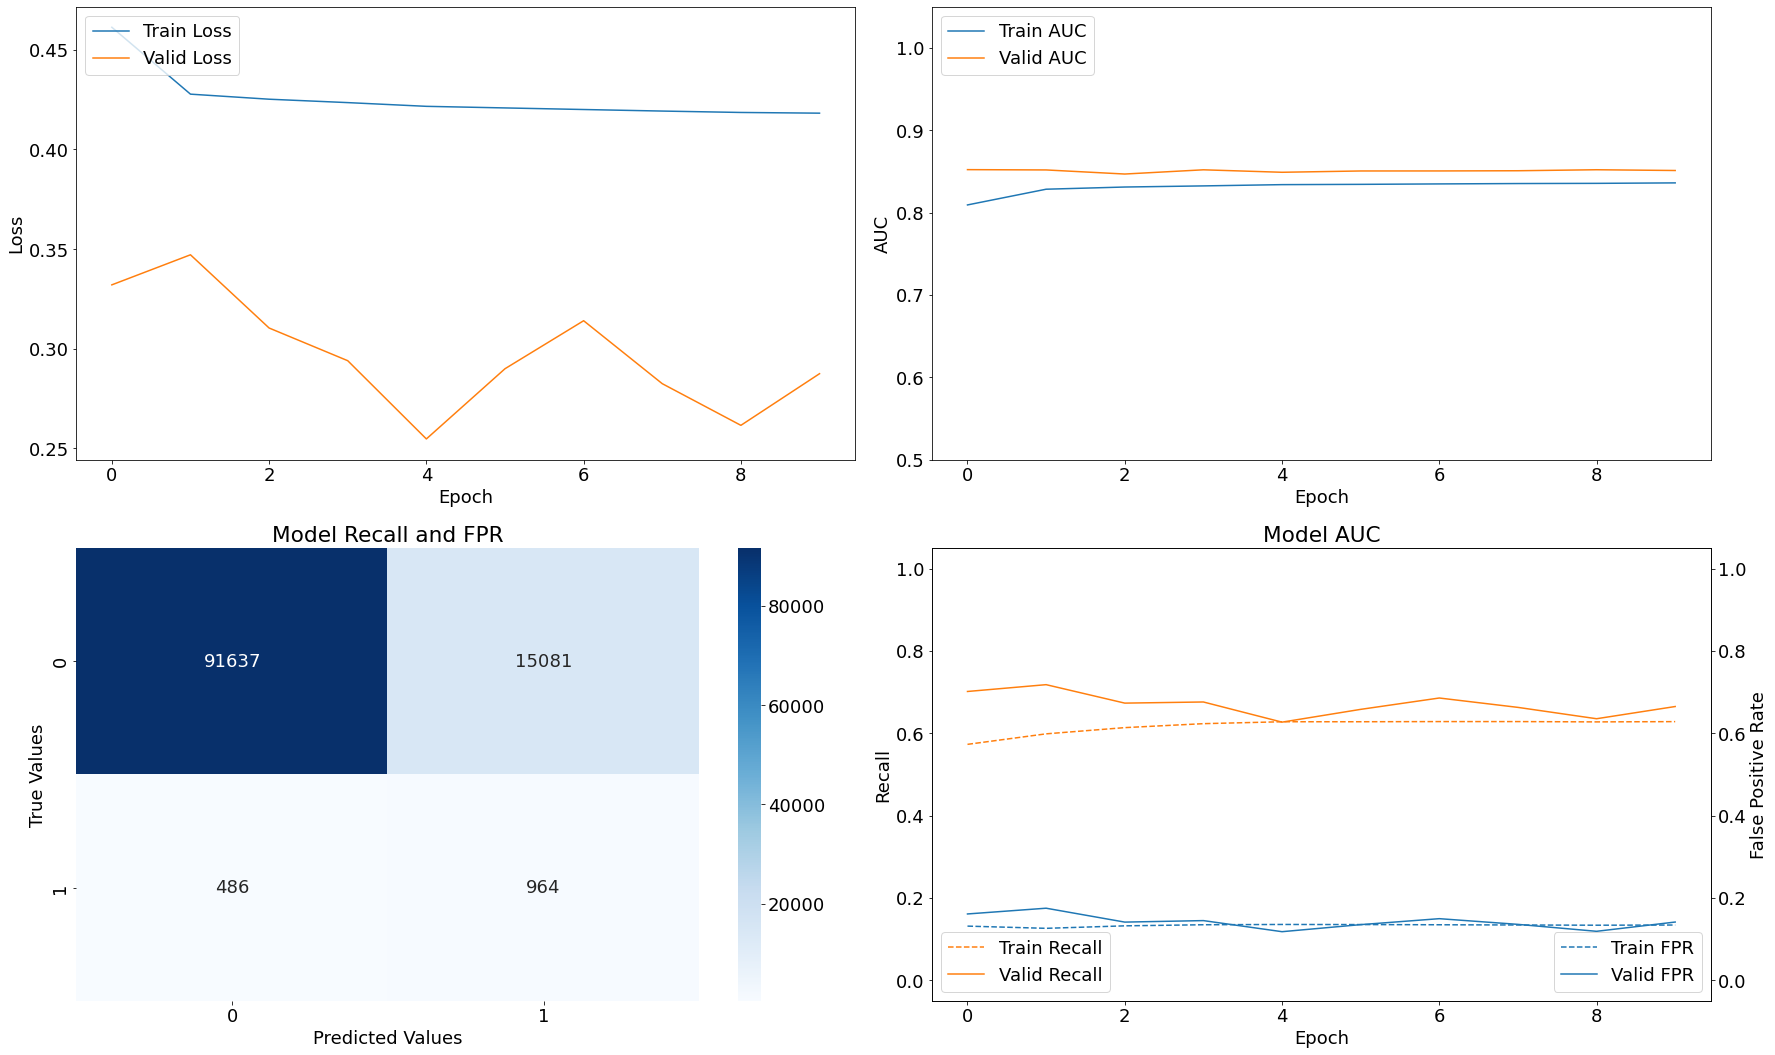

Epoch 00012: early stopping
Results for Variant I Model V9 with threshold = 0.2.

 Train f1: 0.5586024793836478 
 Val f1: 0.12185042357103554 

 Train Recall: 0.7489133477210999 
 Val Recall: 0.630344808101654 

 Train FPR: 0.2331162989139557 
 Val FPR: 0.11842425912618637


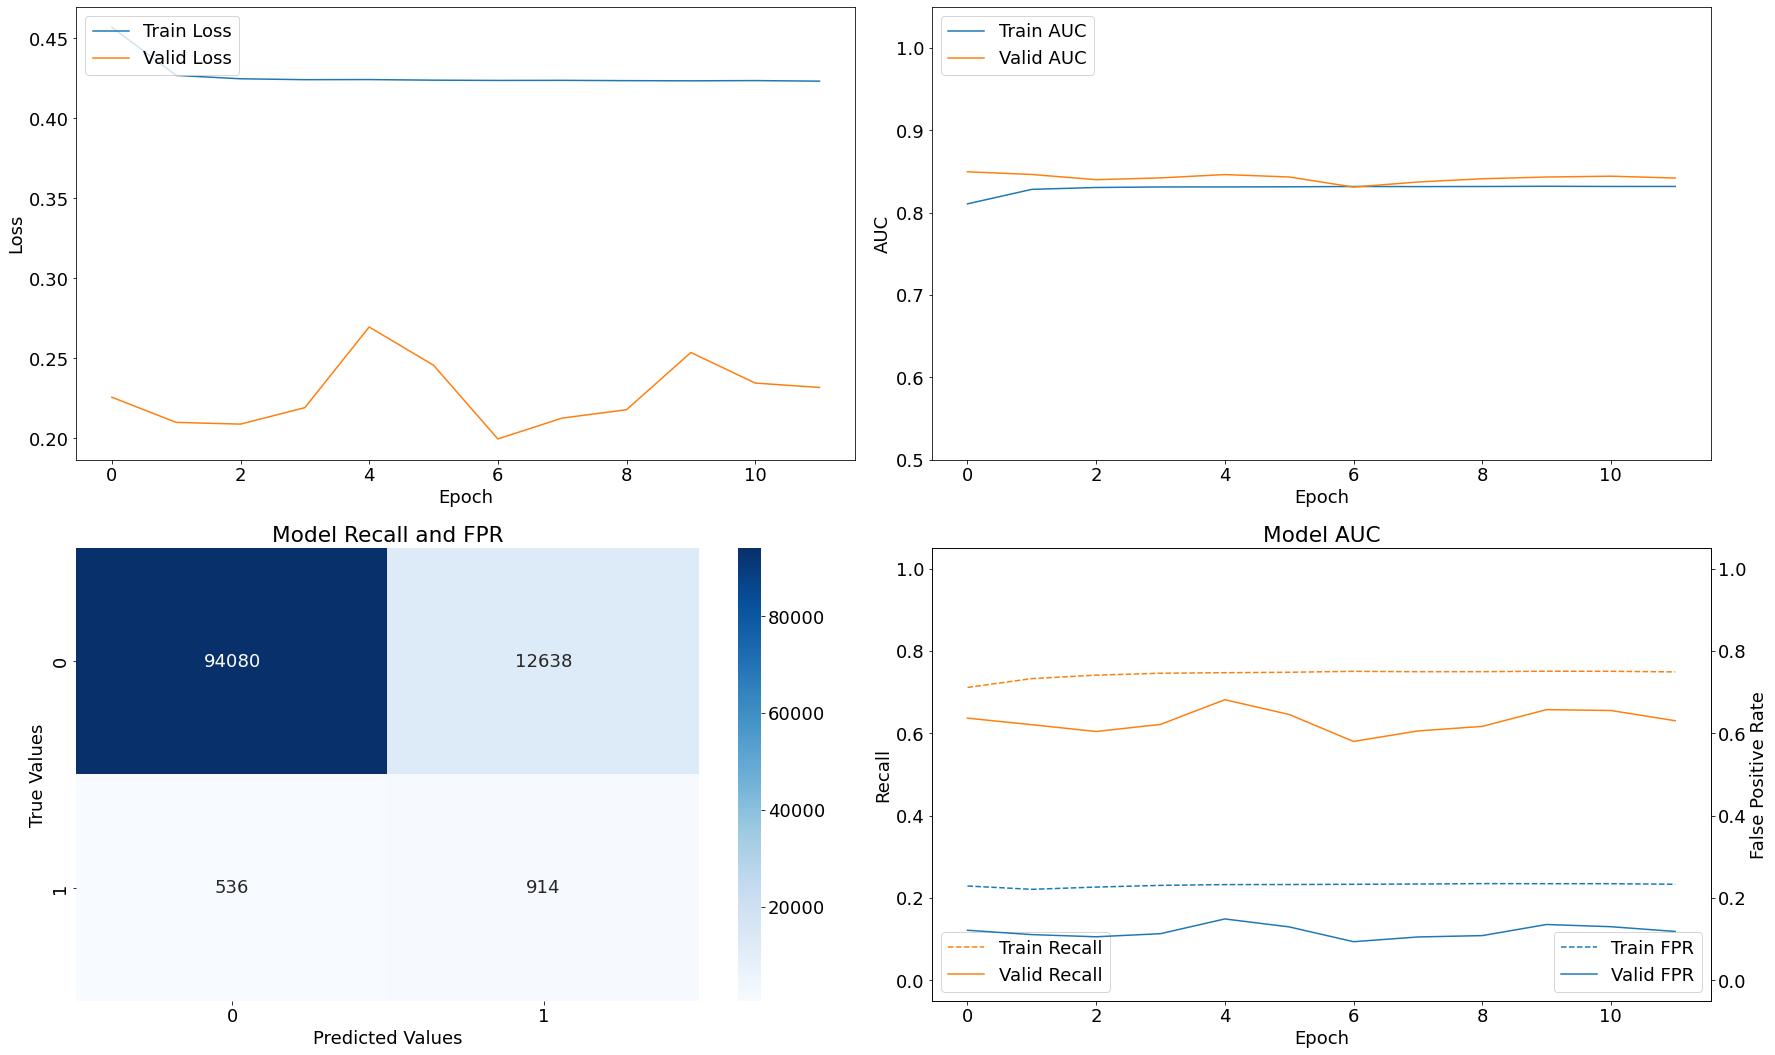

Epoch 00011: early stopping
Results for Variant I Model V9 with threshold = 0.1.

 Train f1: 0.4833700266281849 
 Val f1: 0.07921331333855293 

 Train Recall: 0.8949971795082092 
 Val Recall: 0.8027586340904236 

 Train FPR: 0.45203784108161926 
 Val FPR: 0.2508948743343353


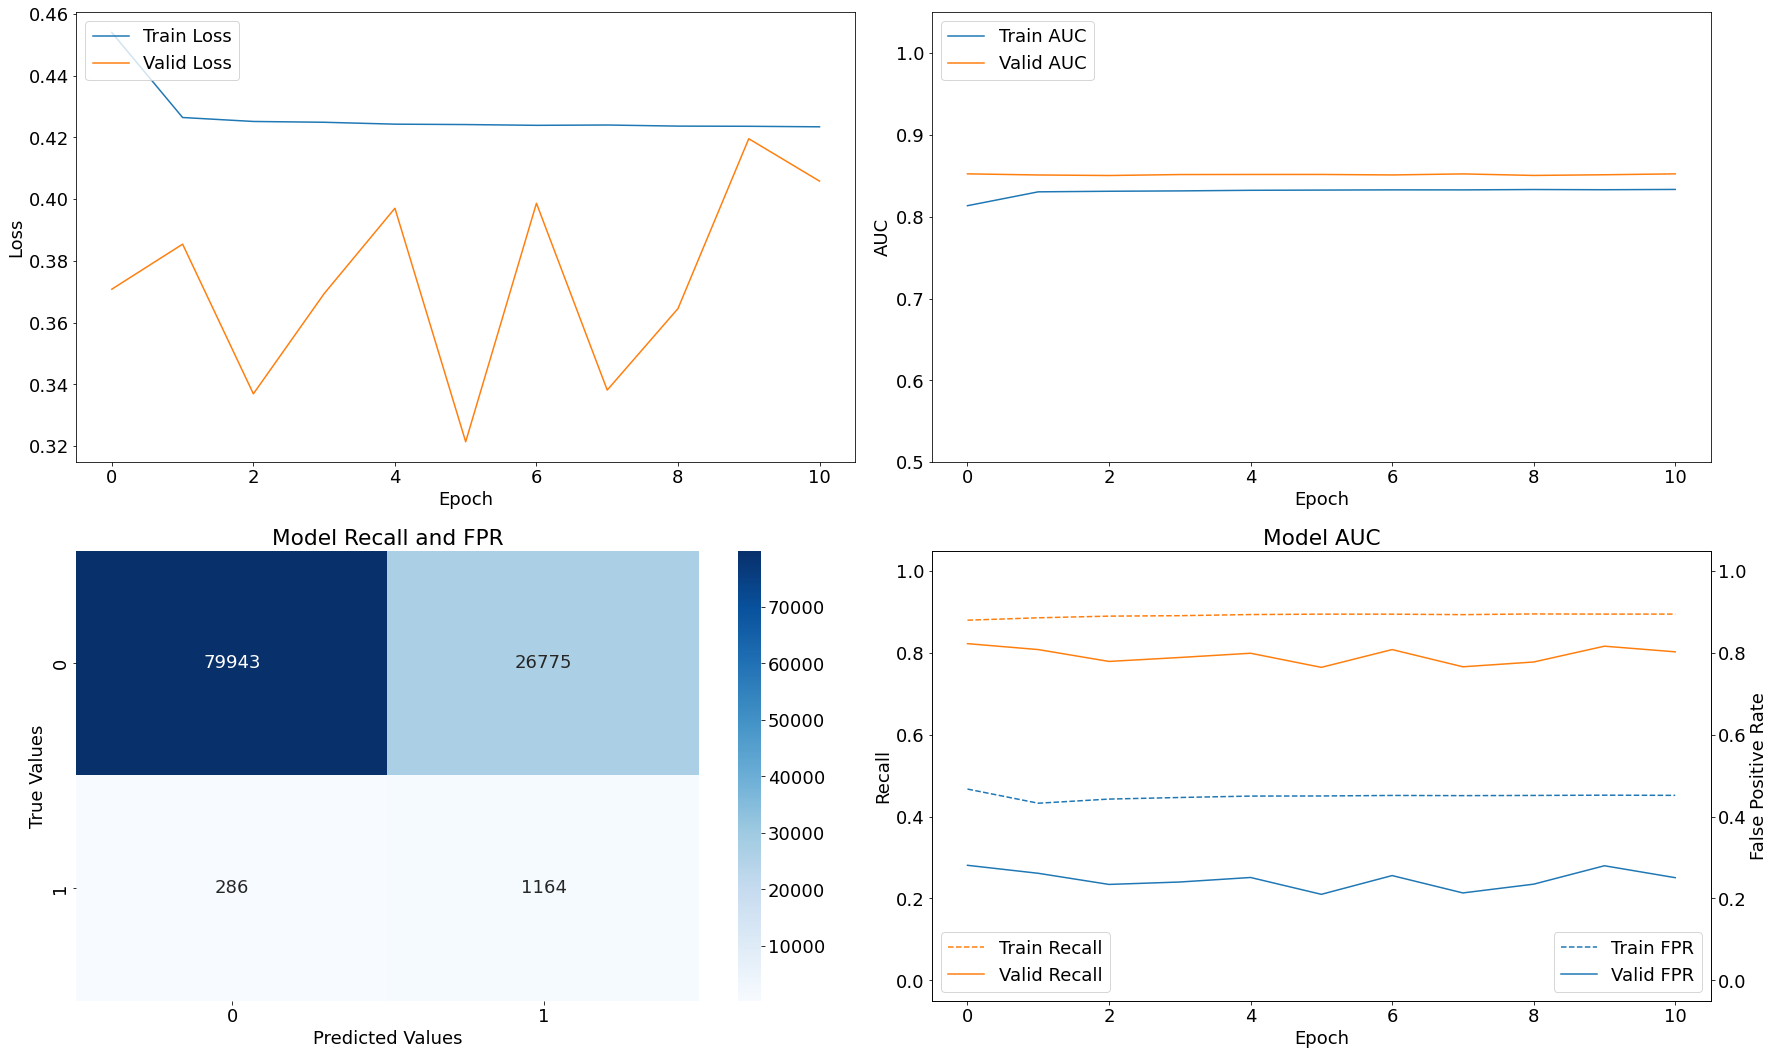

In [63]:
for t in thresholds:
    
    modelling_v9(X_train_v1_scaled_resampled,
                 y_train_v1_resampled,
                 X_val_v1_scaled,
                 y_val_v1,
                 'Variant I Model V9',
                 threshold=t)

---